In [52]:
!pip install missingno
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import missingno as msno
from warnings import filterwarnings
filterwarnings("ignore")

You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.


In [53]:
train = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/telecom%20churn%20(cell2cell)/cell2celltrain.csv")
test = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/telecom%20churn%20(cell2cell)/cell2cellholdout.csv")

In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 20000 non-null  int64  
 1   Churn                      0 non-null      float64
 2   MonthlyRevenue             19940 non-null  float64
 3   MonthlyMinutes             19940 non-null  float64
 4   TotalRecurringCharge       19940 non-null  float64
 5   DirectorAssistedCalls      19940 non-null  float64
 6   OverageMinutes             19940 non-null  float64
 7   RoamingCalls               19940 non-null  float64
 8   PercChangeMinutes          19865 non-null  float64
 9   PercChangeRevenues         19865 non-null  float64
 10  DroppedCalls               20000 non-null  float64
 11  BlockedCalls               20000 non-null  float64
 12  UnansweredCalls            20000 non-null  float64
 13  CustomerCareCalls          20000 non-null  flo

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [56]:
for i in train.columns:
      if train[i].dtype=='object':
            print(pd.DataFrame(train[i].value_counts()))

     Churn
No   36336
Yes  14711
           ServiceArea
NYCBRO917         1684
HOUHOU281         1510
DALDAL214         1498
NYCMAN917         1182
APCFCH703          783
...                ...
OHIRAV330            1
OMANEW515            1
KCYHES316            1
AIRGEO843            1
NCRDNN910            1

[747 rows x 1 columns]
     ChildrenInHH
No          38679
Yes         12368
     HandsetRefurbished
No                43956
Yes                7091
     HandsetWebCapable
Yes              46046
No                5001
     TruckOwner
No        41524
Yes        9523
     RVOwner
No     46894
Yes     4153
         Homeownership
Known            33987
Unknown          17060
     BuysViaMailOrder
No              32596
Yes             18451
     RespondsToMailOffers
No                  31821
Yes                 19226
     OptOutMailings
No            50295
Yes             752
     NonUSTravel
No         48168
Yes         2879
     OwnsComputer
No          41583
Yes          9464
     Ha

In [57]:
train['HandsetPrice'] = train['HandsetPrice'].replace('Unknown', np.nan)
test['HandsetPrice'] = test['HandsetPrice'].replace('Unknown', np.nan)
train['HandsetPrice']  = pd.to_numeric(train['HandsetPrice'] )
test['HandsetPrice']  = pd.to_numeric(test['HandsetPrice'] )
print(train.select_dtypes(exclude=['int', 'float']).columns,"\n***\n"*5,train.select_dtypes(include=['int', 'float']).columns)

Index(['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'OwnsMotorcycle', 'MadeCallToRetentionTeam',
       'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus'],
      dtype='object') 
***

***

***

***

***
 Index(['CustomerID', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'Ha

In [58]:
print(train.columns[train.isnull().any()],"\n***\n"*5,test.columns[test.isnull().any()])

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'ServiceArea', 'Handsets',
       'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'HandsetPrice'],
      dtype='object') 
***

***

***

***

***
 Index(['Churn', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'ServiceArea', 'AgeHH1',
       'AgeHH2', 'HandsetPrice'],
      dtype='object')


In [59]:
test.columns[test.isnull().any()]

Index(['Churn', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'ServiceArea', 'AgeHH1',
       'AgeHH2', 'HandsetPrice'],
      dtype='object')

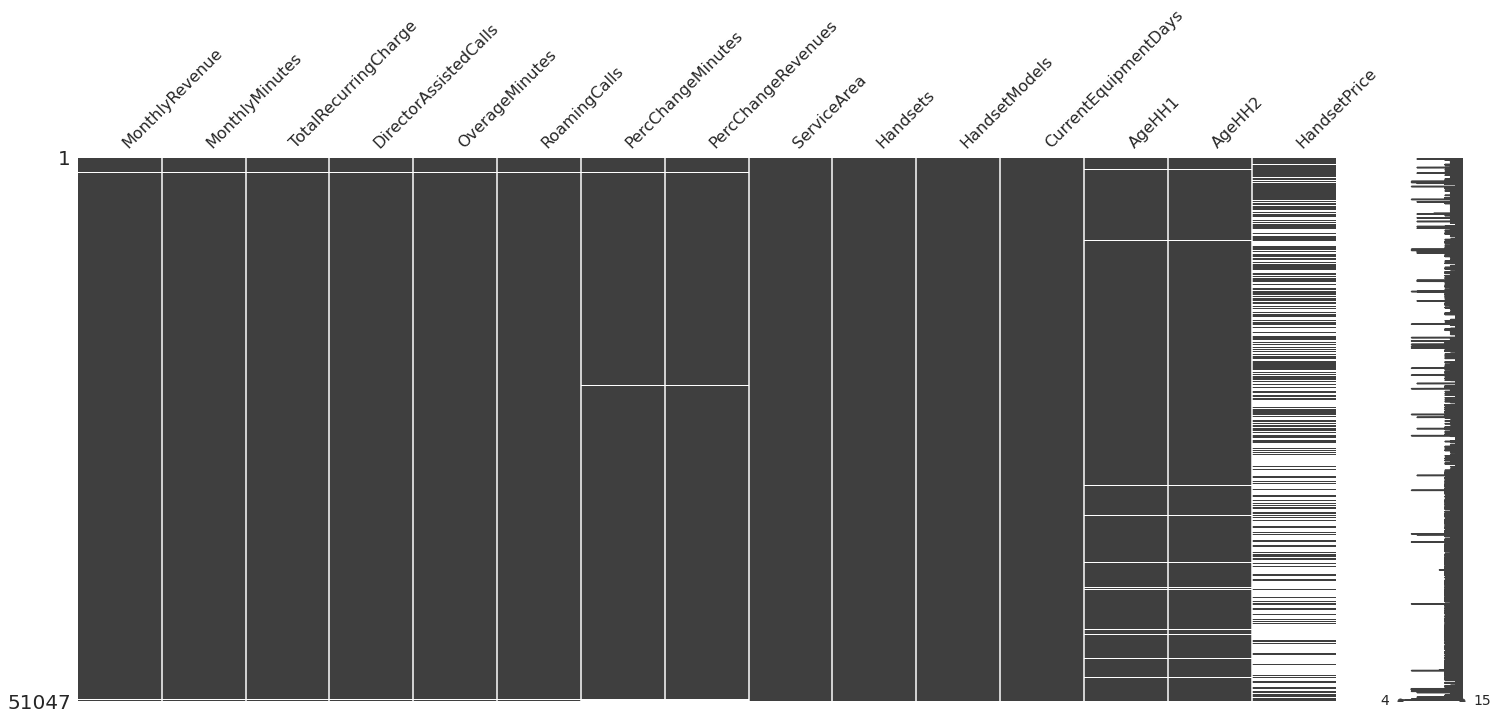

In [60]:
train_missings=train.filter(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'ServiceArea', 'Handsets',
       'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'HandsetPrice'], axis=1)
test_missings=test.filter(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'ServiceArea', 'AgeHH1',
       'AgeHH2', 'HandsetPrice'],axis=1)
msno.matrix(train_missings);

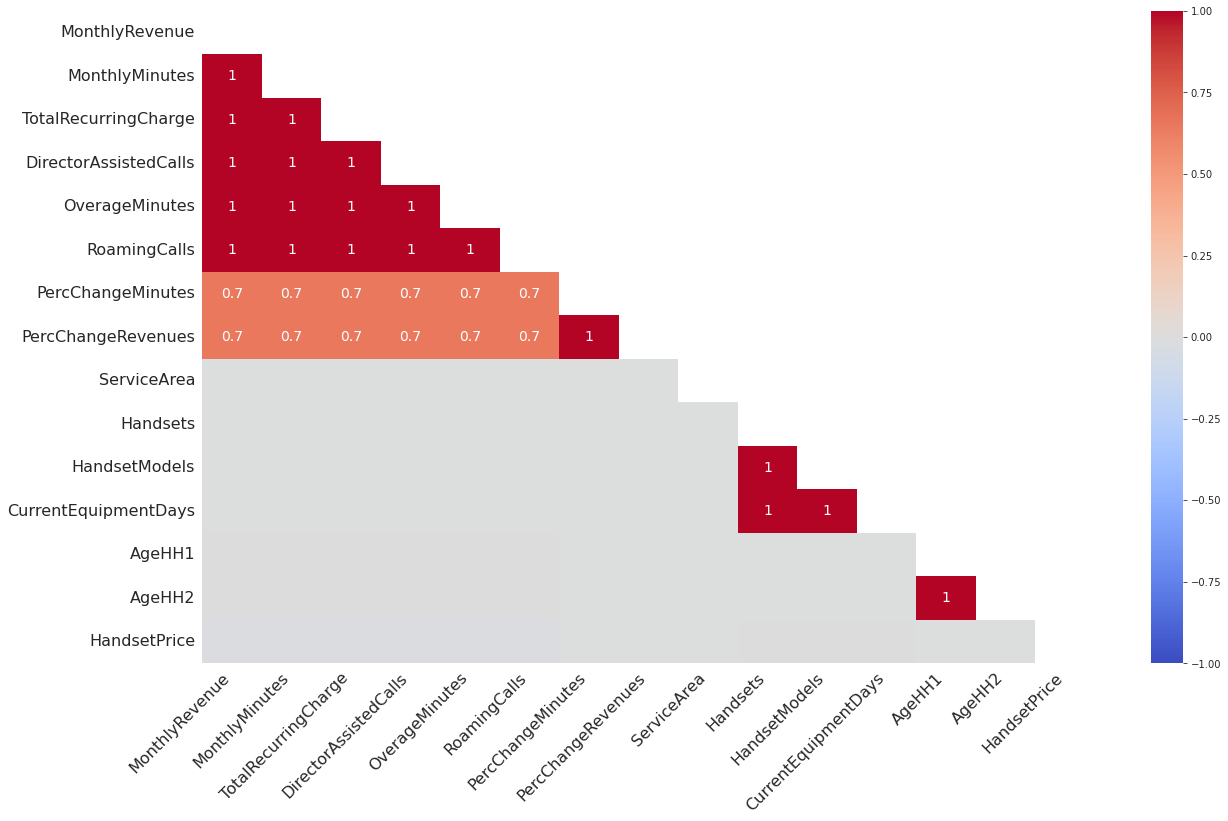

In [61]:
msno.heatmap(train_missings,cmap='coolwarm');

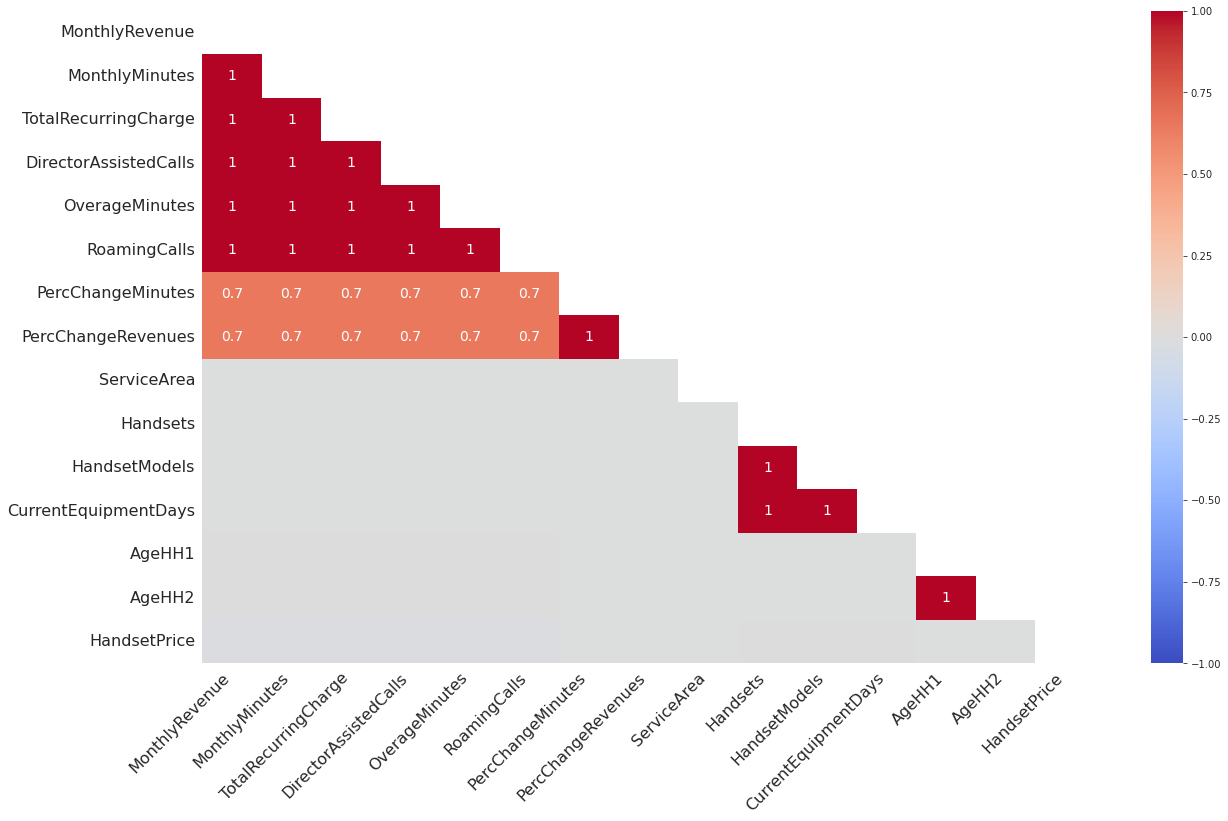

In [62]:
msno.heatmap(train_missings,cmap='coolwarm');

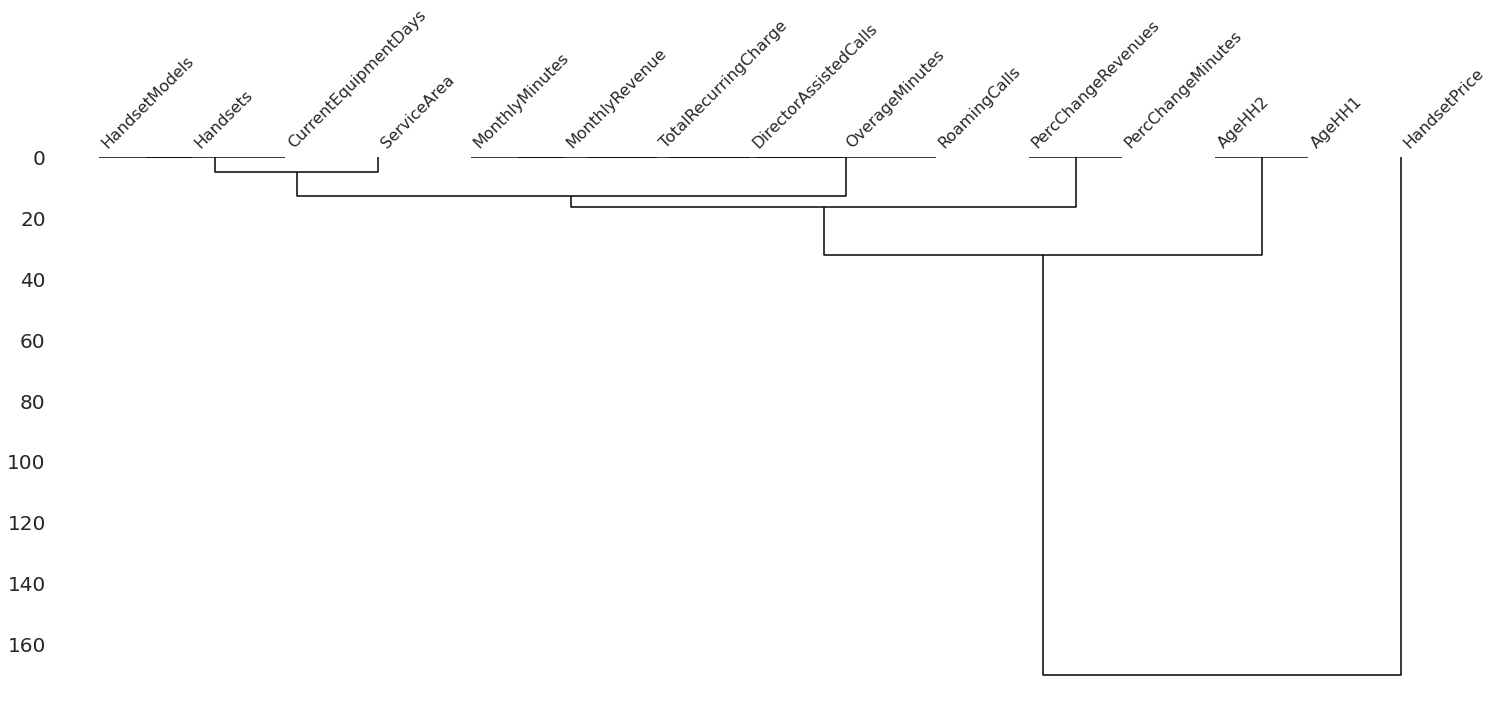

In [63]:
msno.dendrogram(train_missings);

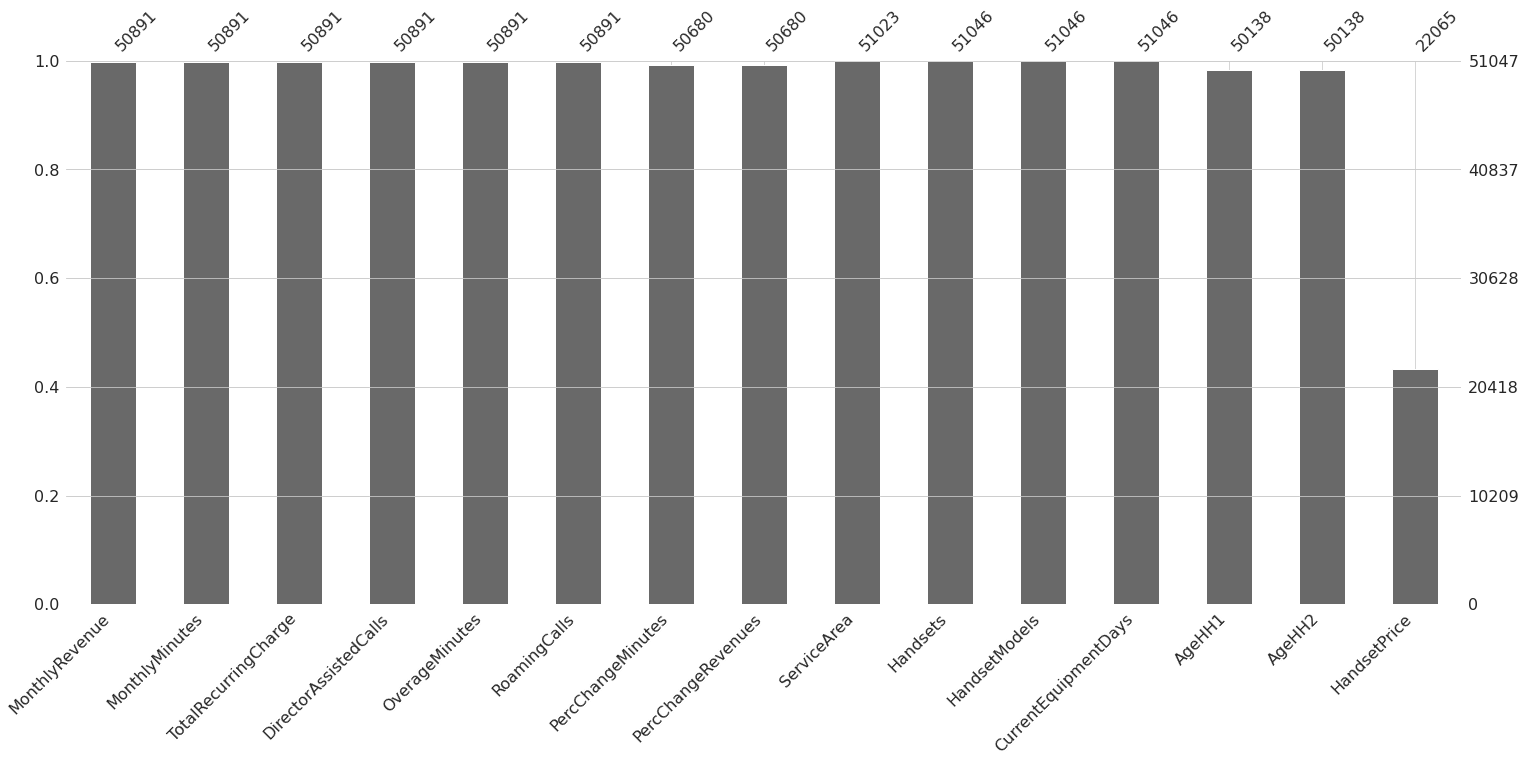

In [64]:
msno.bar(train_missings);

In [65]:
train_missings.describe().T

,count,mean,std,min,25%,50%,75%,max
MonthlyRevenue,50891.0,58.834492,44.507336,-6.17,33.61,48.46,71.065,1223.38
MonthlyMinutes,50891.0,525.653416,529.871063,0.00,158.00,366.00,723.000,7359.00
TotalRecurringCharge,50891.0,46.830088,23.848871,-11.00,30.00,45.00,60.000,400.00
DirectorAssistedCalls,50891.0,0.895229,2.228546,0.00,0.00,0.25,0.990,159.39
OverageMinutes,50891.0,40.027785,96.588076,0.00,0.00,3.00,41.000,4321.00
RoamingCalls,50891.0,1.236244,9.818294,0.00,0.00,0.00,0.300,1112.40
PercChangeMinutes,50680.0,-11.547908,257.514772,-3875.00,-83.00,-5.00,66.000,5192.00
PercChangeRevenues,50680.0,-1.191985,39.574915,-1107.70,-7.10,-0.30,1.600,2483.50
Handsets,51046.0,1.805646,1.331173,1.00,1.00,1.00,2.000,24.00
HandsetModels,51046.0,1.558751,0.905932,1.00,1.00,1.00,2.000,15.00


In [66]:
def values_table(train_missings):
        mis_val = train_missings.isnull().sum()
        mis_val_percent = 100 * train_missings.isnull().sum() / len(train_missings)
        mean=train_missings.mean()
        median=train_missings.median()
        total=train_missings.count()
        zeros=train_missings[train_missings==0].count()
        table = pd.concat([ mis_val,mis_val_percent, mean, median, total, zeros], axis=1)
        table = table.rename(columns = {0 :'Train Missing Values', 1 : '% of Train Total Values', 2 : 'Mean'
                                       , 3 : 'Median' , 4 : '# of Values' , 5 : '# of Zeros'})
        table['Data Type'] = train_missings.dtypes
        table = table[table.iloc[:,1] != 0].sort_values('% of Train Total Values', ascending=False).round(1)
        print ("Dataframe'in içinde " + str(train.shape[1]) + " sütun ve " + str(train.shape[0]) + " satır vardır.\n"      
            "Bu sütunlardan " + str(table.shape[0]) +" tanesinde missing value bulunmaktadır.")
        return table

values_table(train_missings)

Dataframe'in içinde 58 sütun ve 51047 satır vardır.
Bu sütunlardan 15 tanesinde missing value bulunmaktadır.


,Train Missing Values,% of Train Total Values,Mean,Median,# of Values,# of Zeros,Data Type
HandsetPrice,28982,56.8,82.2,60.0,22065,0,float64
AgeHH1,909,1.8,31.3,36.0,50138,13917,float64
AgeHH2,909,1.8,21.1,0.0,50138,26087,float64
PercChangeMinutes,367,0.7,-11.5,-5.0,50680,1124,float64
PercChangeRevenues,367,0.7,-1.2,-0.3,50680,5818,float64
MonthlyRevenue,156,0.3,58.8,48.5,50891,6,float64
MonthlyMinutes,156,0.3,525.7,366.0,50891,723,float64
TotalRecurringCharge,156,0.3,46.8,45.0,50891,160,float64
DirectorAssistedCalls,156,0.3,0.9,0.2,50891,24512,float64
OverageMinutes,156,0.3,40.0,3.0,50891,23262,float64


In [67]:
def values_table(test_missings):
        mis_val = test_missings.isnull().sum()
        mis_val_percent = 100 * test_missings.isnull().sum() / len(test_missings)
        mean=test_missings.mean()
        median=test_missings.median()
        total=test_missings.count()
        zeros=test_missings[test_missings==0].count()
        table = pd.concat([ mis_val,mis_val_percent, mean, median, total, zeros], axis=1)
        table = table.rename(columns = {0 :'Test Missing Values', 1 : '% of Test Total Values', 2 : 'Mean'
                                       , 3 : 'Median' , 4 : '# of Values' , 5 : '# of Zeros'})
        table['Data Type'] = test_missings.dtypes
        table = table[table.iloc[:,1] != 0].sort_values('% of Test Total Values', ascending=False).round(1)
        print ("Dataframe'in içinde " + str(train.shape[1]) + " sütun ve " + str(train.shape[0]) + " satır vardır.\n"      
            "Bu sütunlardan " + str(table.shape[0]) +" tanesinde missing value bulunmaktadır.")
        return table

values_table(test_missings)

Dataframe'in içinde 58 sütun ve 51047 satır vardır.
Bu sütunlardan 12 tanesinde missing value bulunmaktadır.


,Test Missing Values,% of Test Total Values,Mean,Median,# of Values,# of Zeros,Data Type
HandsetPrice,11267,56.3,83.5,80.0,8733,0,float64
AgeHH1,335,1.7,31.5,36.0,19665,5400,float64
AgeHH2,335,1.7,21.2,0.0,19665,10191,float64
PercChangeMinutes,135,0.7,-9.1,-4.0,19865,429,float64
PercChangeRevenues,135,0.7,-1.2,-0.3,19865,2282,float64
MonthlyRevenue,60,0.3,58.9,48.7,19940,2,float64
MonthlyMinutes,60,0.3,525.9,365.0,19940,294,float64
TotalRecurringCharge,60,0.3,46.9,45.0,19940,59,float64
DirectorAssistedCalls,60,0.3,0.9,0.2,19940,9593,float64
OverageMinutes,60,0.3,40.2,2.0,19940,9198,float64


In [68]:
train_1=train.copy()
test_1=test.copy()
train_1.Churn.replace(('Yes', 'No'), (1, 0), inplace=True)
train_1['MonthlyRevenue'].fillna(train_1['MonthlyRevenue'].median(), inplace=True)
test_1['MonthlyRevenue'].fillna(test_1['MonthlyRevenue'].median(), inplace=True)
train_1[train_1['Handsets'].isna()][['HandsetModels','Handsets','CurrentEquipmentDays']] 

,HandsetModels,Handsets,CurrentEquipmentDays
38702,NaN,NaN,NaN


In [69]:
print("Handsets:",train_1.Handsets.mode()[0])
print("HandsetModels:",train_1.HandsetModels.mode()[0])
print("CurrentEquipmentDays:",train_1.CurrentEquipmentDays.mode()[0])

Handsets: 1.0
HandsetModels: 1.0
CurrentEquipmentDays: 202.0


In [70]:
train_1['Handsets'].fillna(train_1['Handsets'].mode()[0],inplace=True)
train_1['HandsetModels'].fillna(train_1['HandsetModels'].mode()[0],inplace=True)
train_1['CurrentEquipmentDays'].mode()[0]

202.0

In [71]:
train_1["CurrentEquipmentDays"].value_counts()

In [72]:
train_1['CurrentEquipmentDays'].fillna(train_1['CurrentEquipmentDays'].median(),inplace=True)
train_1['ServiceArea'].fillna(train_1['ServiceArea'].mode()[0],inplace=True)
test_1['ServiceArea'].fillna(test_1['ServiceArea'].mode()[0],inplace=True)
train_2=train.HandsetPrice.groupby([train['HandsetModels'],
        train['Handsets']]).sum().astype(int).reset_index(name='count_price')
display(train_2[train_2['count_price']==0])

,HandsetModels,Handsets,count_price
0,1.0,1.0,0


In [73]:
train_3=train_1.HandsetPrice.isnull().groupby([train_1['HandsetModels'],
        train_1['Handsets']]).sum().astype(int).reset_index(name='count_missing_price')

display(train_3.count_missing_price.sum())
display(train_3[train_3['count_missing_price'] > 0])

,HandsetModels,Handsets,count_missing_price
0,1.0,1.0,28853
1,1.0,2.0,7
7,2.0,2.0,67
8,2.0,3.0,11
9,2.0,4.0,1
15,3.0,3.0,15
16,3.0,4.0,6
17,3.0,5.0,1
24,4.0,4.0,4
25,4.0,5.0,3


In [74]:
train_1.loc[train_1.HandsetModels.eq(1),'HandsetPrice'] = (train_1.loc[train_1.HandsetModels.eq(1),
                            'HandsetPrice'].fillna(train_1.HandsetPrice.median()))
train_1['HandsetPrice']= train_1['HandsetPrice'].fillna(train_1.groupby([train_1['HandsetModels'],
        train_1['Handsets']])['HandsetPrice'].transform('median'))
train_1.HandsetPrice.isnull().sum()

0

In [75]:
test_2=test.HandsetPrice.groupby([test['HandsetModels'],
        test['Handsets']]).sum().astype(int).reset_index(name='count_price')
display(test_2[test_2['count_price']==0])

,HandsetModels,Handsets,count_price
0,1,1,0


In [76]:
test_3=test_1.HandsetPrice.isnull().groupby([test_1['HandsetModels'],
        test_1['Handsets']]).sum().astype(int).reset_index(name='count_missing_price')

display(test_3.count_missing_price.sum())
display(test_3[test_3['count_missing_price'] > 0])

,HandsetModels,Handsets,count_missing_price
0,1,1,11210
1,1,2,4
6,2,2,27
7,2,3,5
13,3,3,9
14,3,4,4
15,3,5,1
21,4,4,2
23,4,6,1
29,5,5,2


In [77]:
test_1.loc[test_1.HandsetModels.eq(1),'HandsetPrice'] = (test_1.loc[test_1.HandsetModels.eq(1),
                            'HandsetPrice'].fillna(test_1.HandsetPrice.median()))
test_1['HandsetPrice']= test_1['HandsetPrice'].fillna(test_1.groupby([test_1['HandsetModels'],
        test_1['Handsets']])['HandsetPrice'].transform('median'))

In [78]:
test_1.HandsetPrice.isnull().sum()

0

In [79]:
train_1['AgeHH1'].fillna(value=0,inplace=True)
test_1['AgeHH1'].fillna(value=0,inplace=True)
train_1['AgeHH2'].fillna(value=0,inplace=True)
test_1['AgeHH2'].fillna(value=0,inplace=True)
display(train_1.groupby(['Churn'],as_index=False)['MonthlyMinutes'].median().style.hide_index())

Churn,MonthlyMinutes
0,381.000000
1,330.000000


In [80]:
train_1['MonthlyMinutes'].fillna(train_1.groupby('Churn')['MonthlyMinutes'].transform('median'), inplace=True)
test_1['MonthlyMinutes'].fillna(test_1['MonthlyMinutes'].median(), inplace=True)
train_1['TotalRecurringCharge'].fillna(train_1['TotalRecurringCharge'].median(),inplace=True)
test_1['TotalRecurringCharge'].fillna(test_1['TotalRecurringCharge'].median(),inplace=True)
train_1['PercChangeRevenues'].fillna(value=0,inplace=True)
test_1['PercChangeRevenues'].fillna(value=0,inplace=True)
train_1['PercChangeMinutes'].fillna(value=0,inplace=True)
test_1['PercChangeMinutes'].fillna(value=0,inplace=True)
train_1['RoamingCalls'].fillna(value=0,inplace=True)
test_1['RoamingCalls'].fillna(value=0,inplace=True)
train_1['OverageMinutes'].fillna(value=0,inplace=True)
test_1['OverageMinutes'].fillna(value=0,inplace=True)
train_1['DirectorAssistedCalls'].fillna(value=0,inplace=True)
test_1['DirectorAssistedCalls'].fillna(value=0,inplace=True)

In [81]:
test_1.isnull().sum()

In [82]:
train_yeni=train_1.select_dtypes(include=['int', 'float'])
from scipy.stats import zscore
from scipy import stats 
#Z Score
train_1_replaced = train_yeni.copy()
outliers={}
for col in train_yeni:
    z_score = zscore(train_yeni[col])
    upper_replace_value = train_yeni[z_score<=3][col].max()
    lower_replace_value = train_yeni[z_score>=-3][col].min()
    train_1_replaced = train_yeni.copy()
    outliers[col] = len(train_1_replaced[col][(train_1_replaced[col] > upper_replace_value)| (train_1_replaced[col] < lower_replace_value)])
outliers_zscore=pd.DataFrame(outliers.items(),columns=['Feature','Outliers'])
print("Outlier Z Score:\n",outliers_zscore)

Outlier Z Score:
                       Feature  Outliers
0                  CustomerID         0
1                       Churn         0
2              MonthlyRevenue       880
3              MonthlyMinutes       914
4        TotalRecurringCharge       541
5       DirectorAssistedCalls       837
6              OverageMinutes       901
7                RoamingCalls       315
8           PercChangeMinutes      1102
9          PercChangeRevenues       841
10               DroppedCalls       987
11               BlockedCalls       819
12            UnansweredCalls       975
13          CustomerCareCalls       853
14              ThreewayCalls       567
15              ReceivedCalls      1067
16              OutboundCalls       966
17               InboundCalls       976
18             PeakCallsInOut       939
19          OffPeakCallsInOut      1034
20        DroppedBlockedCalls       883
21        CallForwardingCalls        49
22           CallWaitingCalls       765
23            MonthsIn

In [83]:
train_2_replaced = train_yeni.copy()
outliers_1={}
for col in train_yeni:
    q1 = train_yeni[col].quantile(q=0.15)
    q3 = train_yeni[col].quantile(q=0.85)
    iqr = stats.iqr(train_yeni[col]) 
    train_2_replaced = train_yeni.copy()
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr
    outliers_1[col] = len(train_2_replaced[col][(train_2_replaced[col] > upper_limit)| (train_2_replaced[col] < lower_limit)])
outliers_iqr=pd.DataFrame(outliers_1.items(),columns=['Feature','Outliers'])
print("IQR Outliers:\n",outliers_iqr)

IQR Outliers:
                       Feature  Outliers
0                  CustomerID         0
1                       Churn         0
2              MonthlyRevenue      2157
3              MonthlyMinutes      1553
4        TotalRecurringCharge       560
5       DirectorAssistedCalls      3920
6              OverageMinutes      4000
7                RoamingCalls      6659
8           PercChangeMinutes      4947
9          PercChangeRevenues      9679
10               DroppedCalls      2524
11               BlockedCalls      3966
12            UnansweredCalls      2436
13          CustomerCareCalls      4521
14              ThreewayCalls      3234
15              ReceivedCalls      2318
16              OutboundCalls      2174
17               InboundCalls      3390
18             PeakCallsInOut      1924
19          OffPeakCallsInOut      2317
20        DroppedBlockedCalls      2684
21        CallForwardingCalls       234
22           CallWaitingCalls      5026
23            MonthsInSer

In [84]:
train_3_replaced = train_yeni.copy()
outliers_2={}
for col in train_yeni:
    lower_lim = train_yeni[col].quantile(q=0.01)
    upper_lim = train_yeni[col].quantile(q=0.99)
    outliers_2[col] = len(train_3_replaced[col][(train_3_replaced[col] > upper_lim)| (train_3_replaced[col] < lower_lim)])
outliers_hard=pd.DataFrame(outliers_2.items(),columns=['Feature','Outliers'])
print("Hard Edge Outliers:\n",outliers_hard)

Hard Edge Outliers:
                       Feature  Outliers
0                  CustomerID      1022
1                       Churn         0
2              MonthlyRevenue       935
3              MonthlyMinutes       511
4        TotalRecurringCharge       975
5       DirectorAssistedCalls       490
6              OverageMinutes       511
7                RoamingCalls       510
8           PercChangeMinutes      1021
9          PercChangeRevenues      1022
10               DroppedCalls       493
11               BlockedCalls       510
12            UnansweredCalls       509
13          CustomerCareCalls       505
14              ThreewayCalls       490
15              ReceivedCalls       511
16              OutboundCalls       507
17               InboundCalls       509
18             PeakCallsInOut       510
19          OffPeakCallsInOut       510
20        DroppedBlockedCalls       507
21        CallForwardingCalls       234
22           CallWaitingCalls       497
23            Month

In [85]:
numerik = train_1.select_dtypes(include=['int', 'float'])
numerik

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice
0,3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,2.0,361.0,62.0,0.0,1,0,0,4,0,30.0
1,3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,1.0,1504.0,40.0,42.0,0,0,0,5,0,30.0
2,3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,1.0,1812.0,26.0,26.0,0,0,0,6,0,60.0
3,3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,4.0,458.0,30.0,0.0,0,0,0,6,0,10.0
4,3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,3.0,852.0,46.0,54.0,0,0,0,9,1,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,1,48.46,330.0,45.0,0.00,0.0,0.0,0.0,0.0,...,2.0,526.0,68.0,64.0,0,0,0,6,0,60.0
51043,3399974,0,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,2.0,464.0,48.0,48.0,0,0,0,9,1,60.0
51044,3399978,1,48.46,330.0,45.0,0.00,0.0,0.0,0.0,0.0,...,2.0,378.0,36.0,0.0,0,0,0,7,1,80.0
51045,3399990,0,48.46,381.0,45.0,0.00,0.0,0.0,0.0,0.0,...,2.0,433.0,32.0,0.0,0,0,0,9,0,30.0


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter
%matplotlib inline
rcParams['figure.figsize']= 5, 4
sns.set_style('whitegrid')
train_4_replaced = train_yeni.copy()
model = DBSCAN(eps = 0.8, min_samples=19).fit(train_yeni)
print(model)

DBSCAN(eps=0.8, min_samples=19)


In [87]:
outliers_df = pd.DataFrame(train_yeni)
print (Counter(model.labels_))
print("***"*20)
print (outliers_df[model.labels_==-1])

Counter({-1: 51047})
************************************************************
       CustomerID  Churn  MonthlyRevenue  MonthlyMinutes  \
0         3000002      1           24.00           219.0   
1         3000010      1           16.99            10.0   
2         3000014      0           38.00             8.0   
3         3000022      0           82.28          1312.0   
4         3000026      1           17.14             0.0   
...           ...    ...             ...             ...   
51042     3399958      1           48.46           330.0   
51043     3399974      0           95.17          1745.0   
51044     3399978      1           48.46           330.0   
51045     3399990      0           48.46           381.0   
51046     3399994      0           48.46           381.0   

       TotalRecurringCharge  DirectorAssistedCalls  OverageMinutes  \
0                      22.0                   0.25             0.0   
1                      17.0                   0.00       

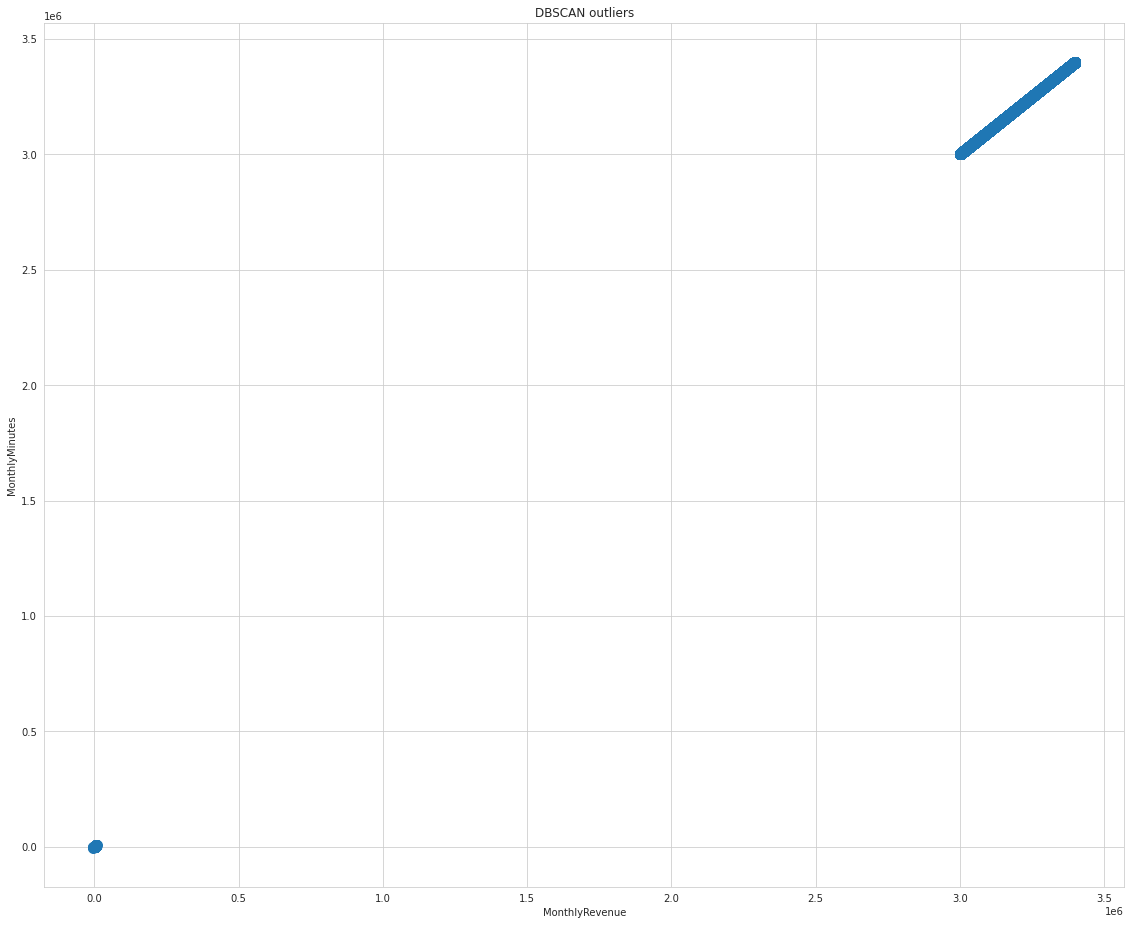

In [88]:
fig = plt.figure()
ax = fig.add_axes([3,3,3,3])
colors = model.labels_
ax.scatter(outliers_df.iloc[outliers_df.index[:],:],outliers_df.iloc[:,:], s=100)
ax.set_xlabel('MonthlyRevenue')
ax.set_ylabel('MonthlyMinutes')
plt.title('DBSCAN outliers')

In [89]:
train_yeni.loc[train_yeni.index[1:10000]]

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice
1,3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,1.0,1504.0,40.0,42.0,0,0,0,5,0,30.0
2,3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,1.0,1812.0,26.0,26.0,0,0,0,6,0,60.0
3,3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,4.0,458.0,30.0,0.0,0,0,0,6,0,10.0
4,3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,3.0,852.0,46.0,54.0,0,0,0,9,1,10.0
5,3000030,0,38.05,682.0,52.0,0.25,0.0,0.0,148.0,-3.1,...,2.0,231.0,28.0,0.0,0,0,0,1,1,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3078810,1,50.57,28.0,60.0,0.00,0.0,0.6,-20.0,-0.6,...,2.0,683.0,32.0,0.0,0,0,0,4,0,30.0
9996,3078826,1,39.65,58.0,30.0,0.25,26.0,0.0,-58.0,-9.7,...,1.0,684.0,28.0,28.0,0,0,0,7,0,60.0
9997,3078830,0,30.51,77.0,30.0,0.25,0.0,0.0,-24.0,-0.5,...,1.0,684.0,42.0,40.0,0,0,0,9,0,60.0
9998,3078834,1,30.77,160.0,45.0,0.74,0.0,0.0,-105.0,-30.2,...,2.0,572.0,0.0,0.0,0,0,0,0,0,30.0


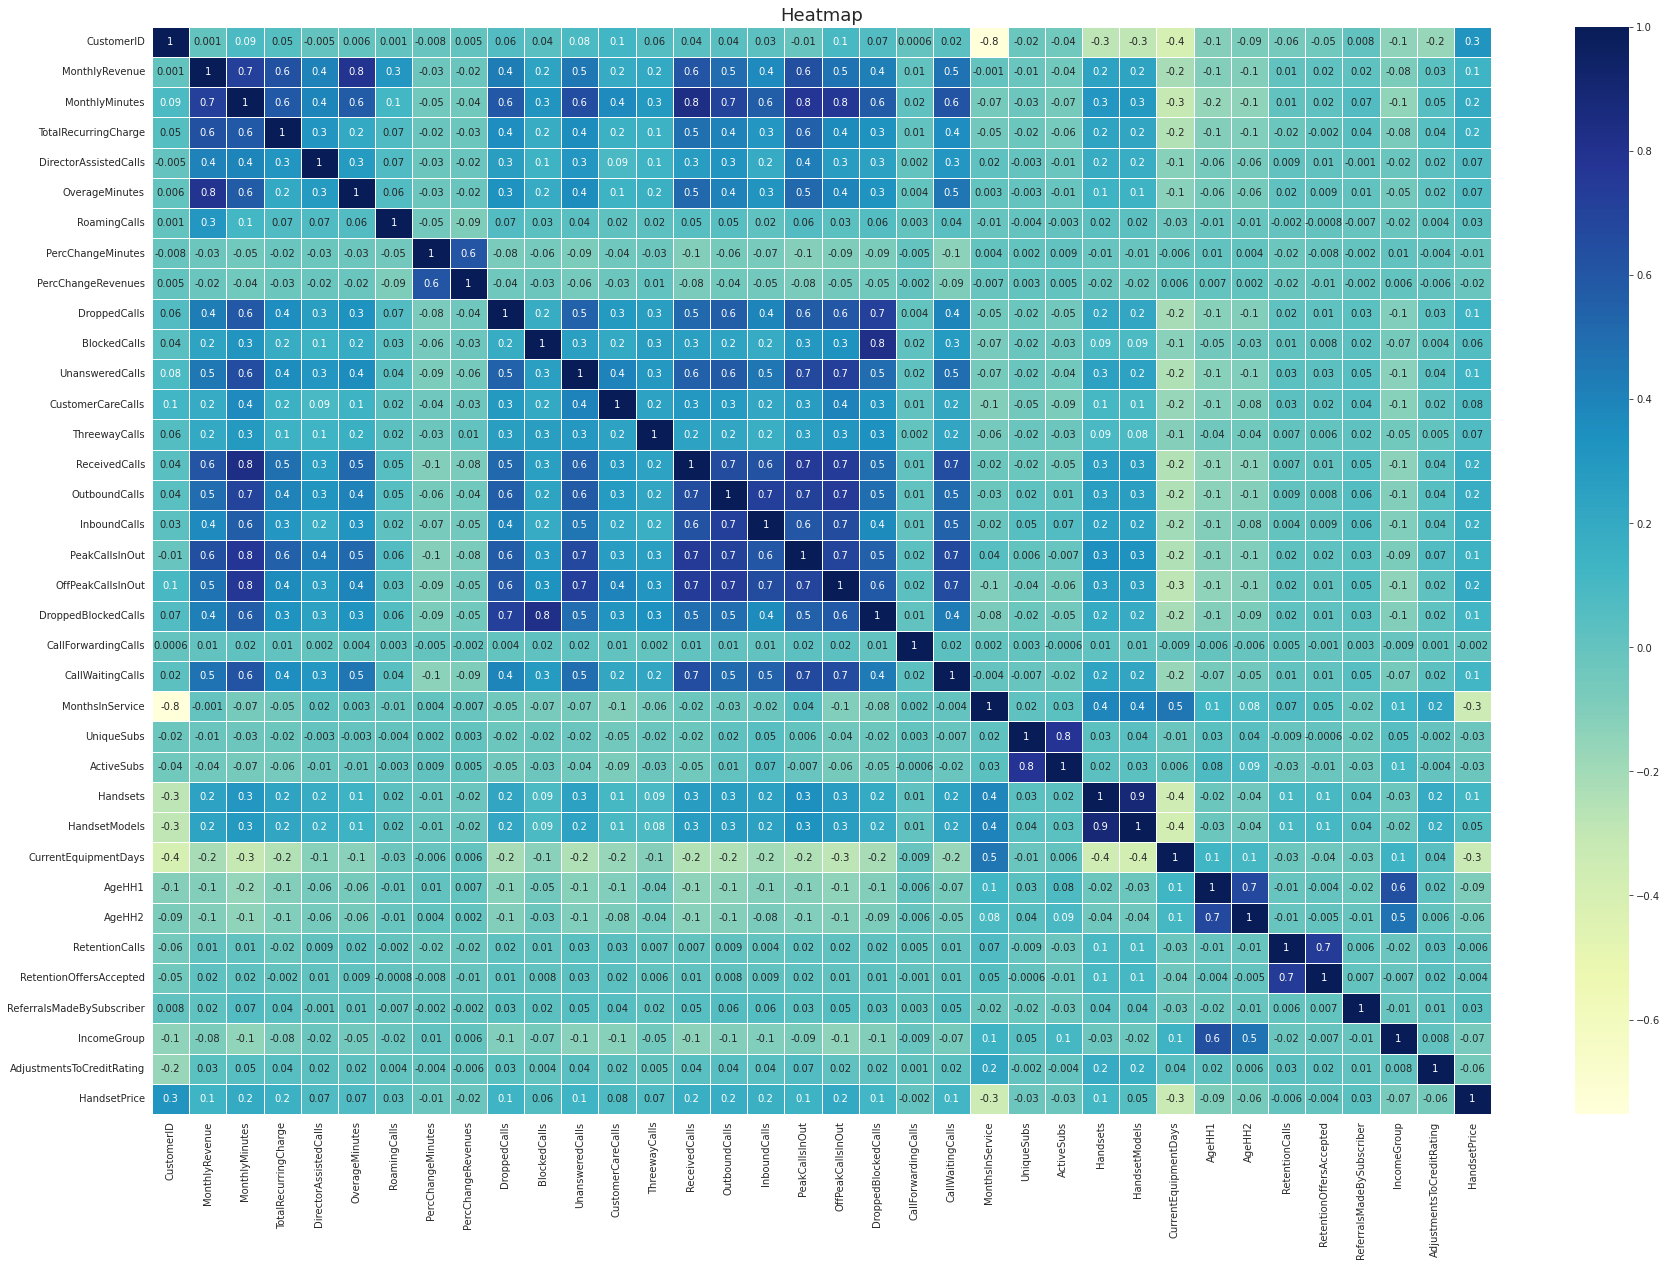

In [90]:
plt.rcParams["figure.figsize"] = (30,20)
sns.heatmap(train[:].corr(),annot = True,fmt='.1g',linecolor='white',cmap="YlGnBu",linewidths=.5)
plt.title("Heatmap",fontsize= 18)
plt.show()

In [91]:
((numerik['PercChangeMinutes']<0)==True).sum()

26816

In [92]:
((numerik['RoamingCalls']>555)==True).sum()

3

In [93]:
((numerik['MonthlyMinutes']>2000)==True).sum()

1136

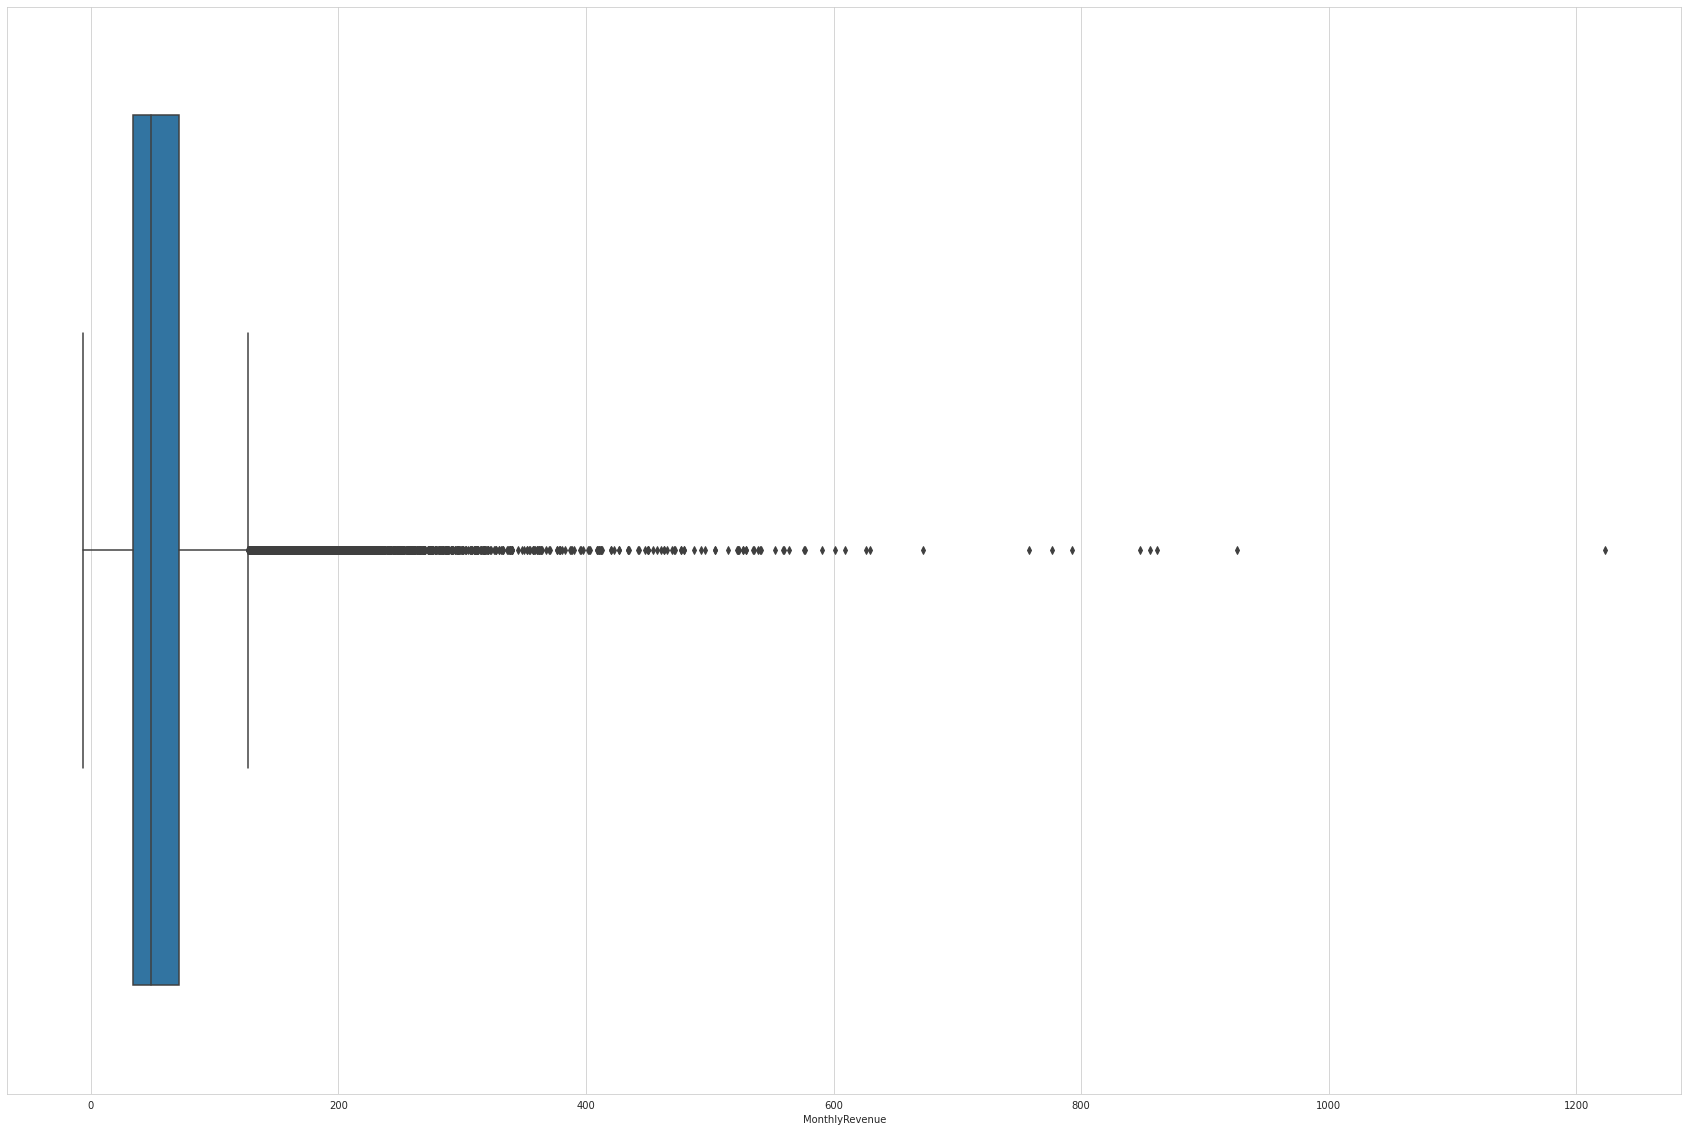

In [94]:
sns.boxplot(train['MonthlyRevenue'])

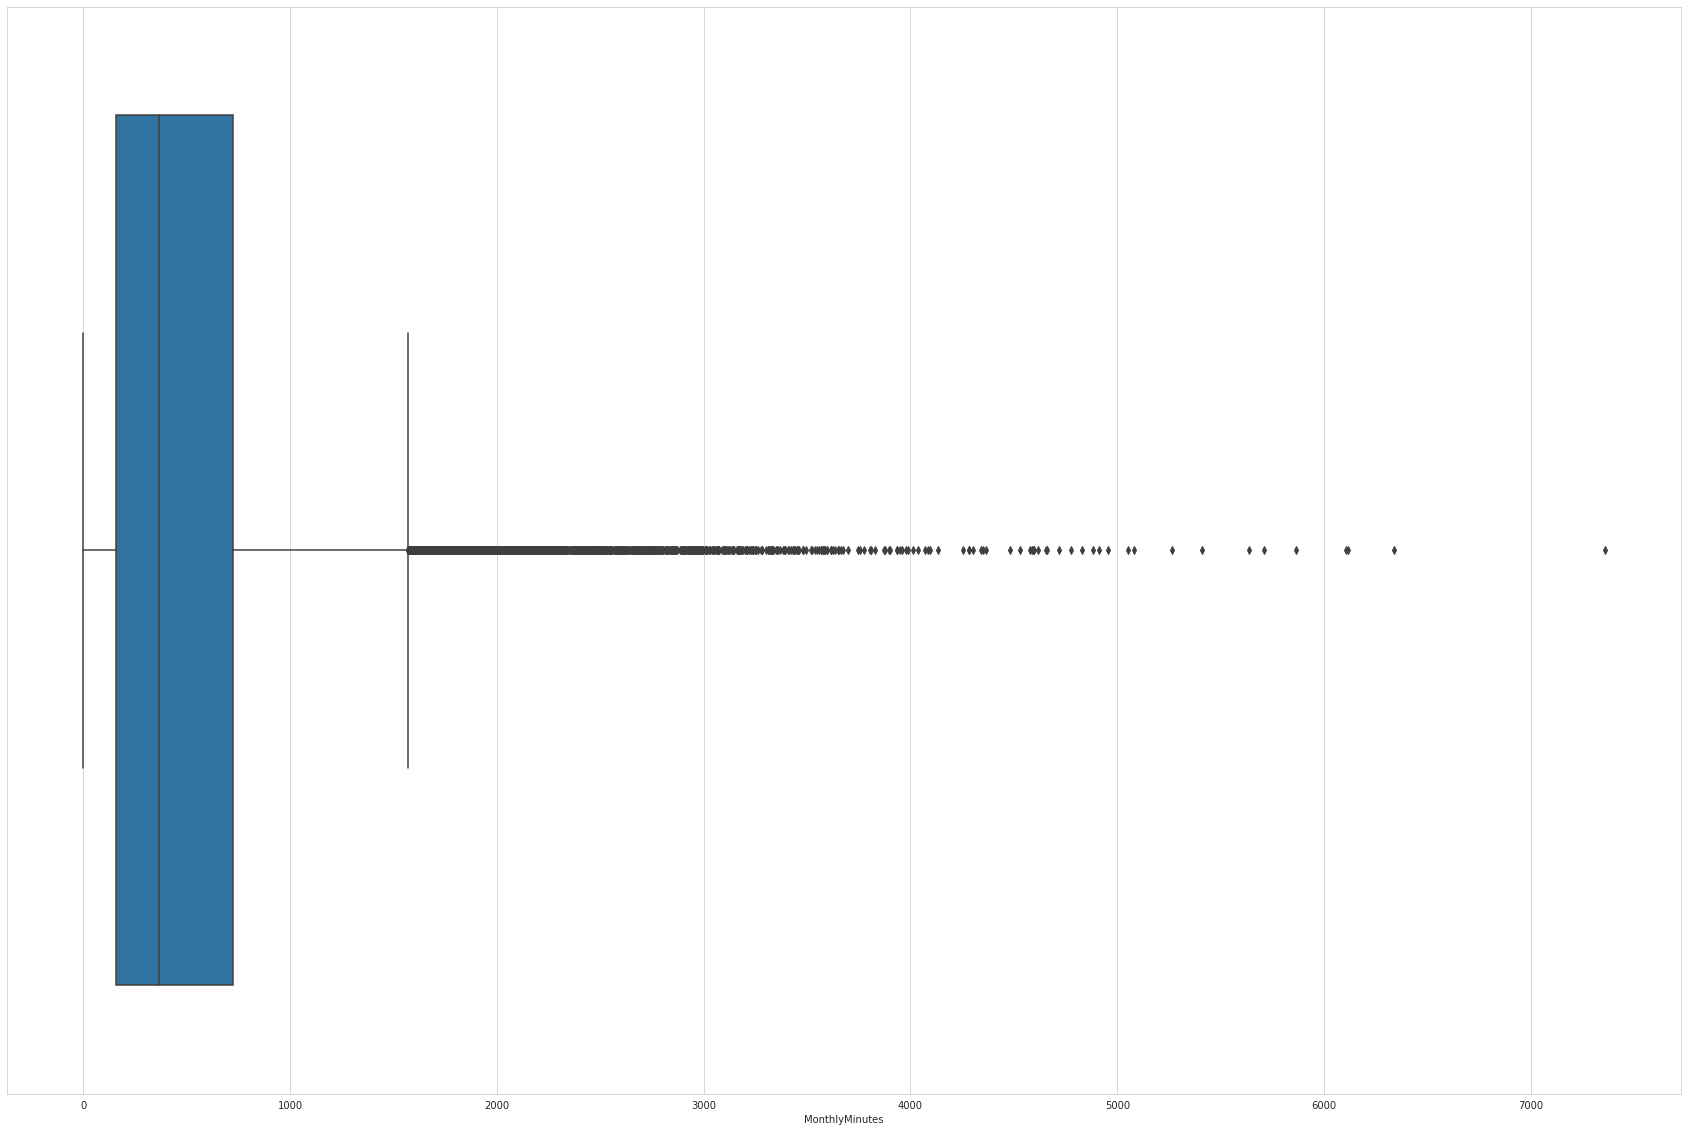

In [95]:
sns.boxplot(train['MonthlyMinutes'])

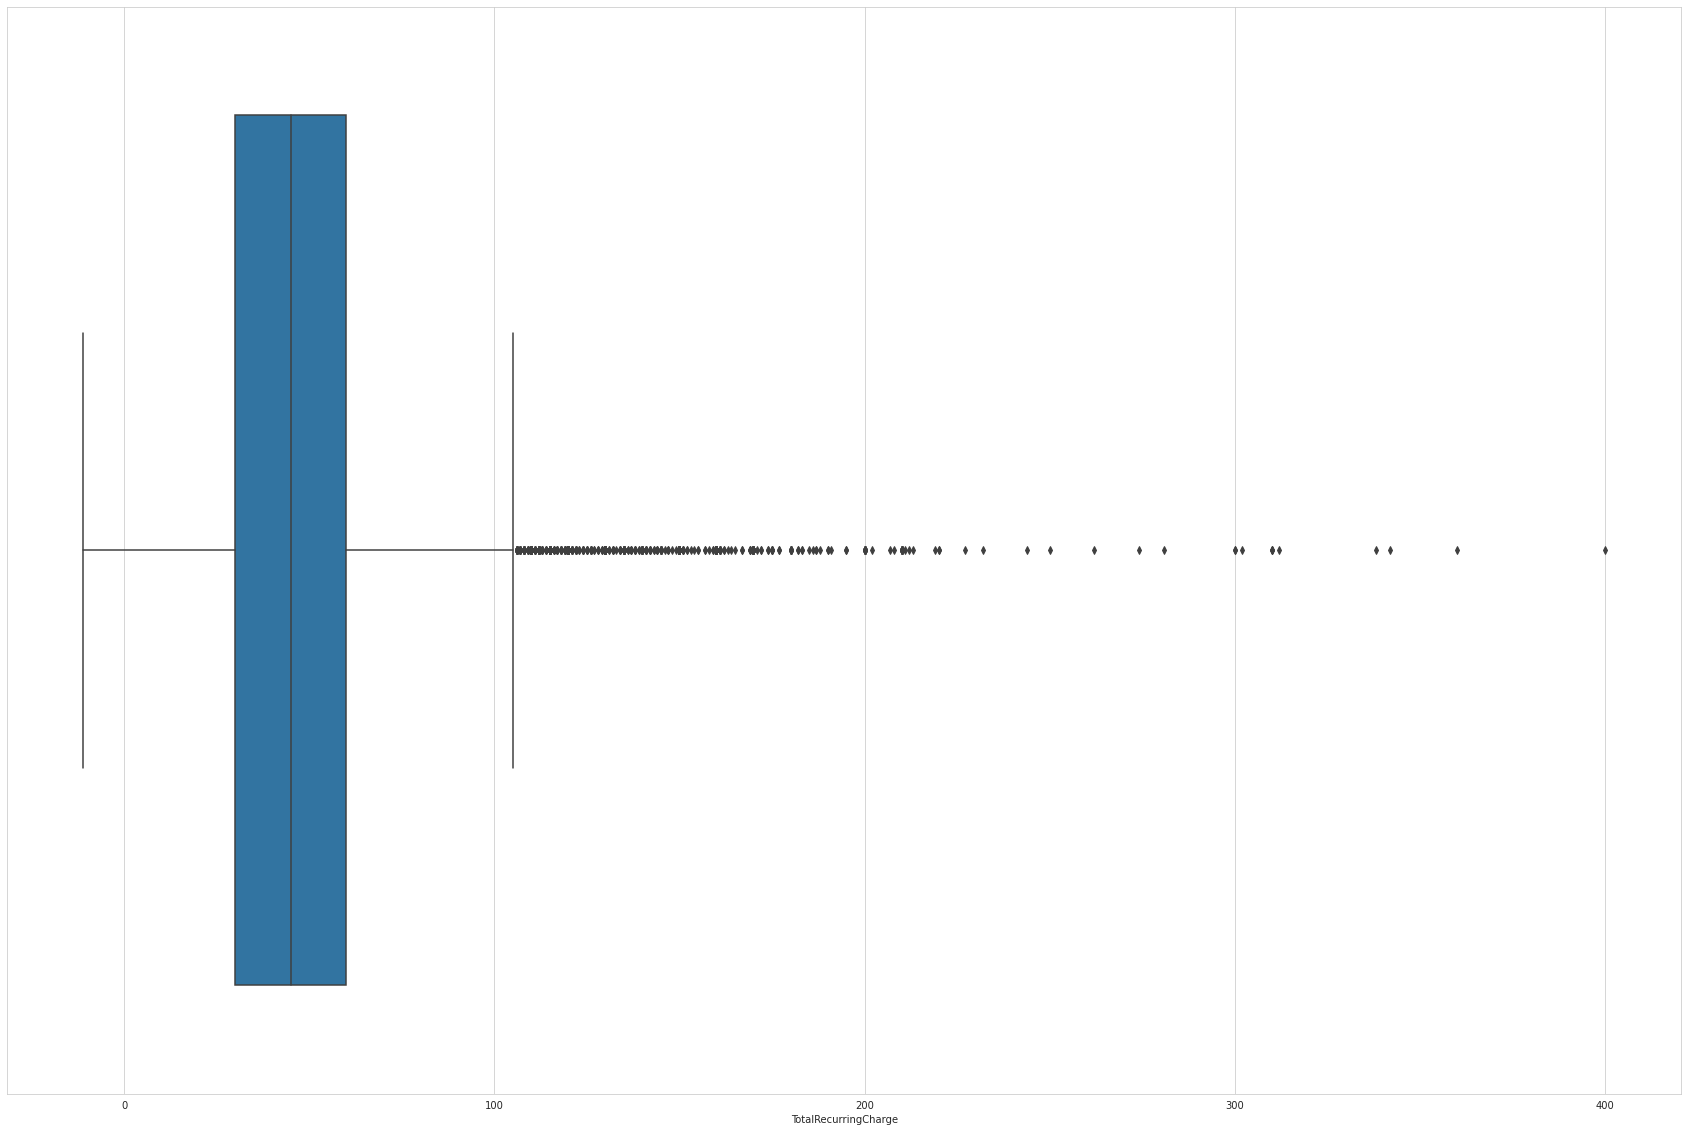

In [96]:
sns.boxplot(train['TotalRecurringCharge'])

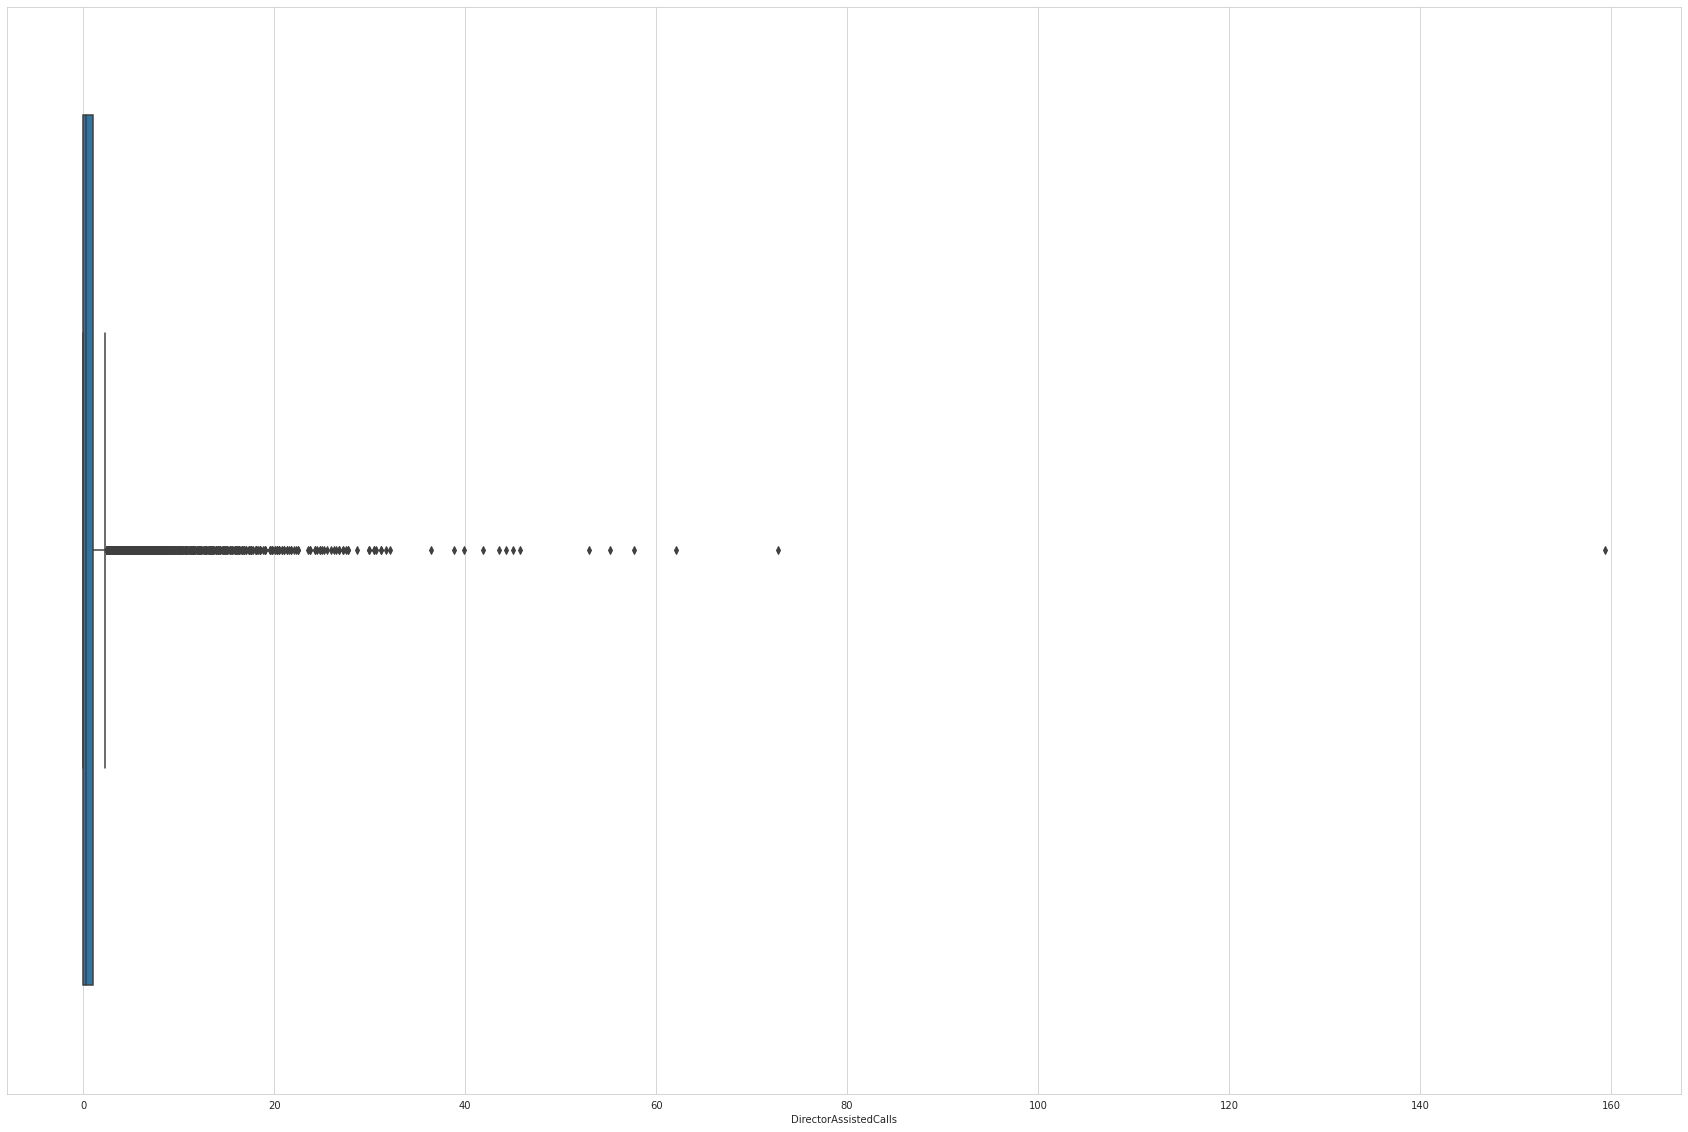

In [97]:
sns.boxplot(train['DirectorAssistedCalls'])

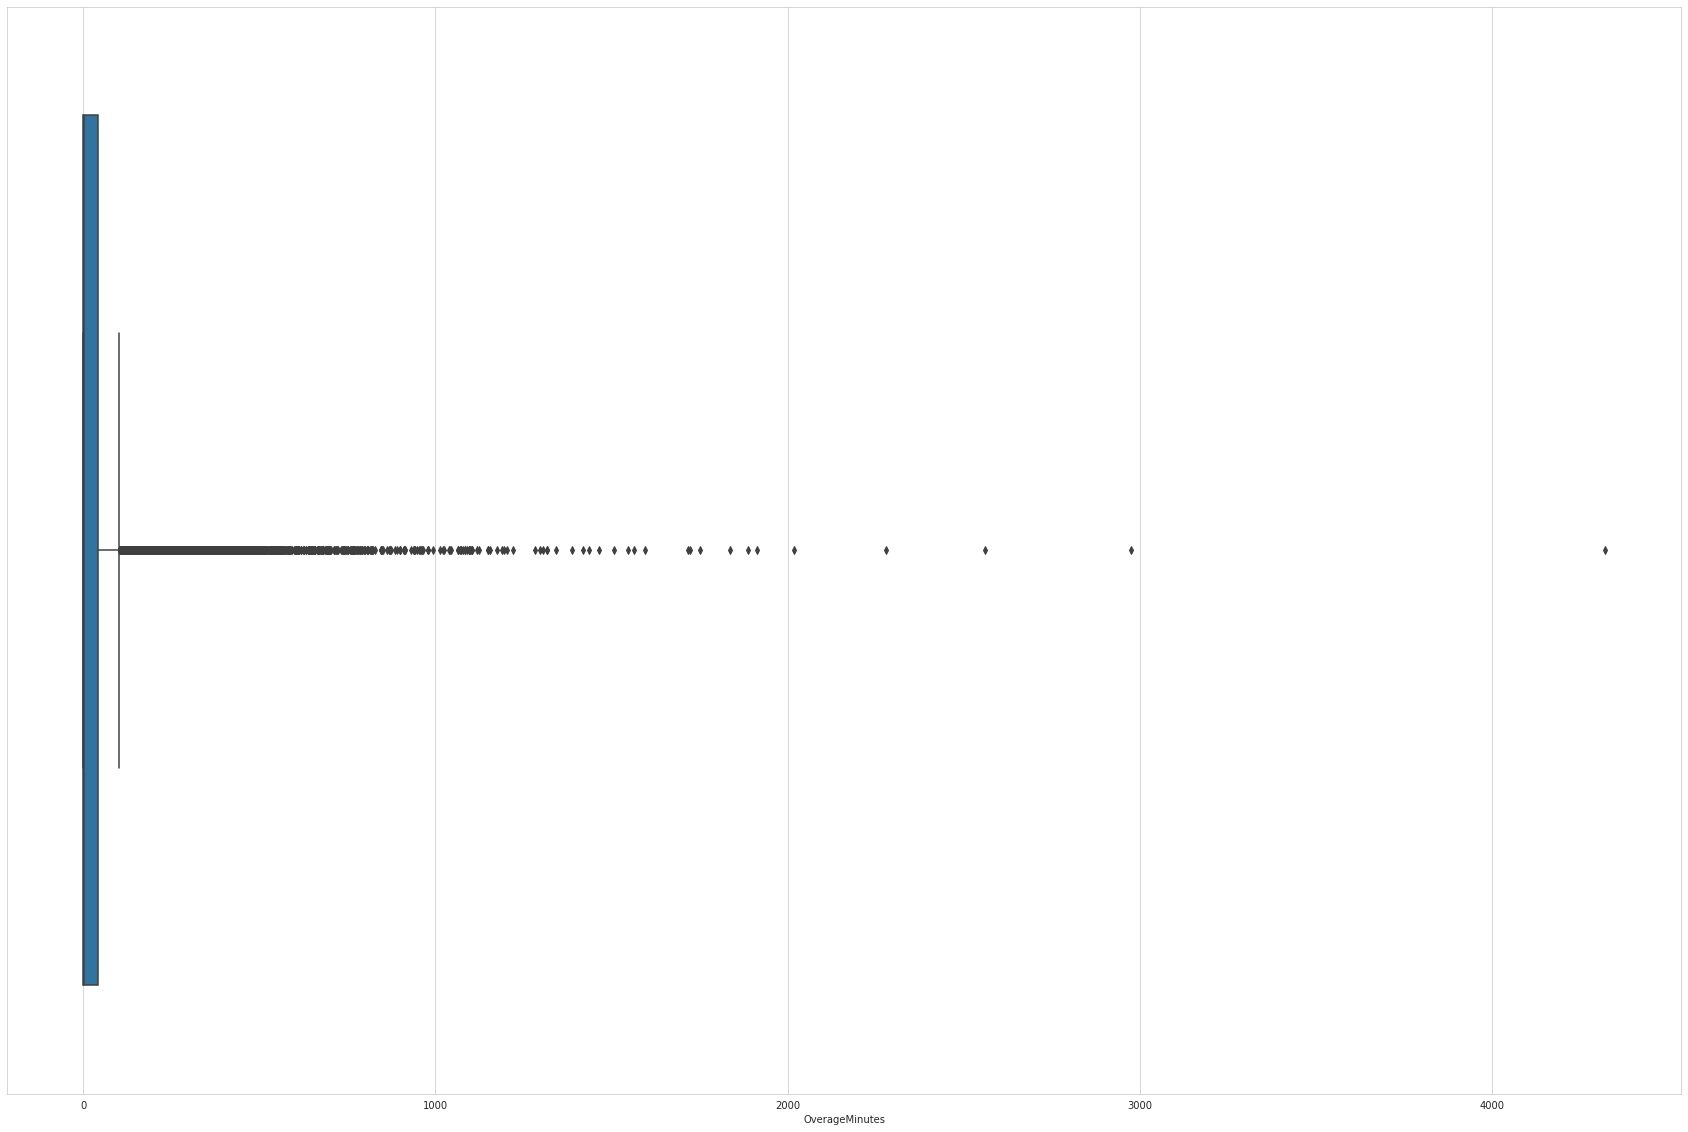

In [98]:
sns.boxplot(train['OverageMinutes'])

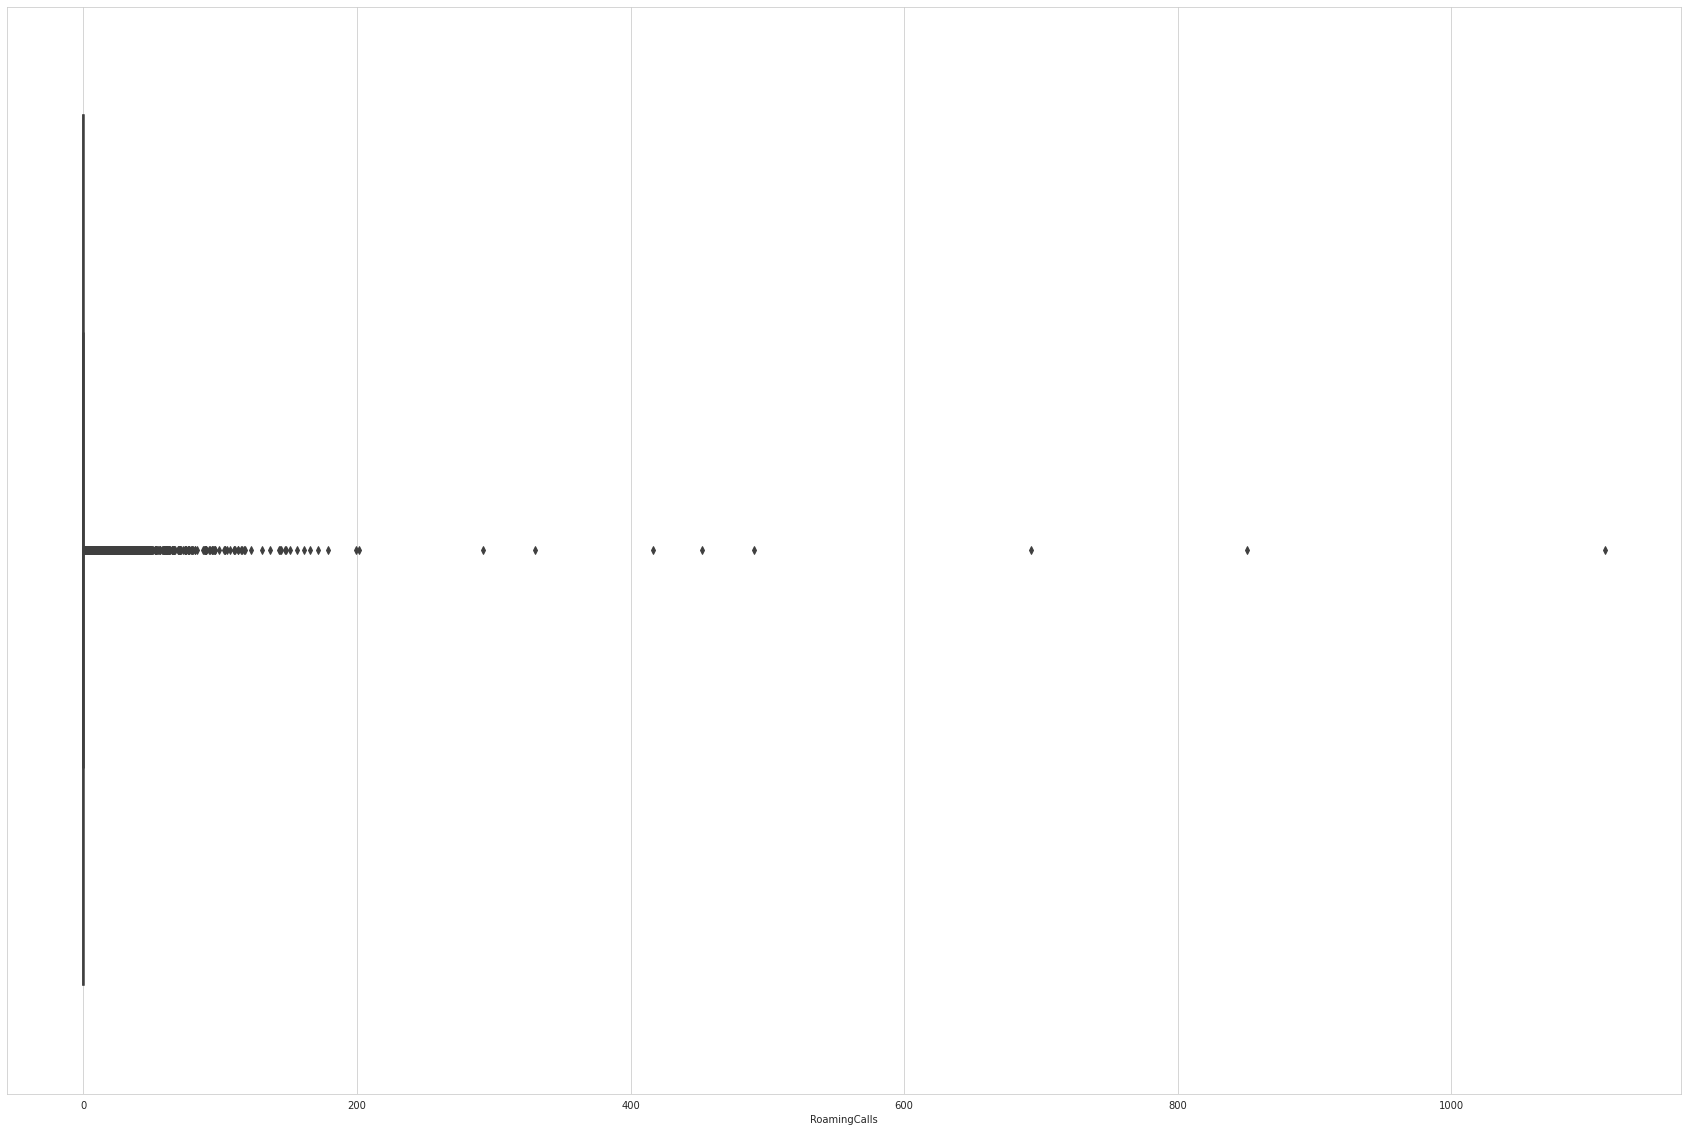

In [99]:
sns.boxplot(train['RoamingCalls'])

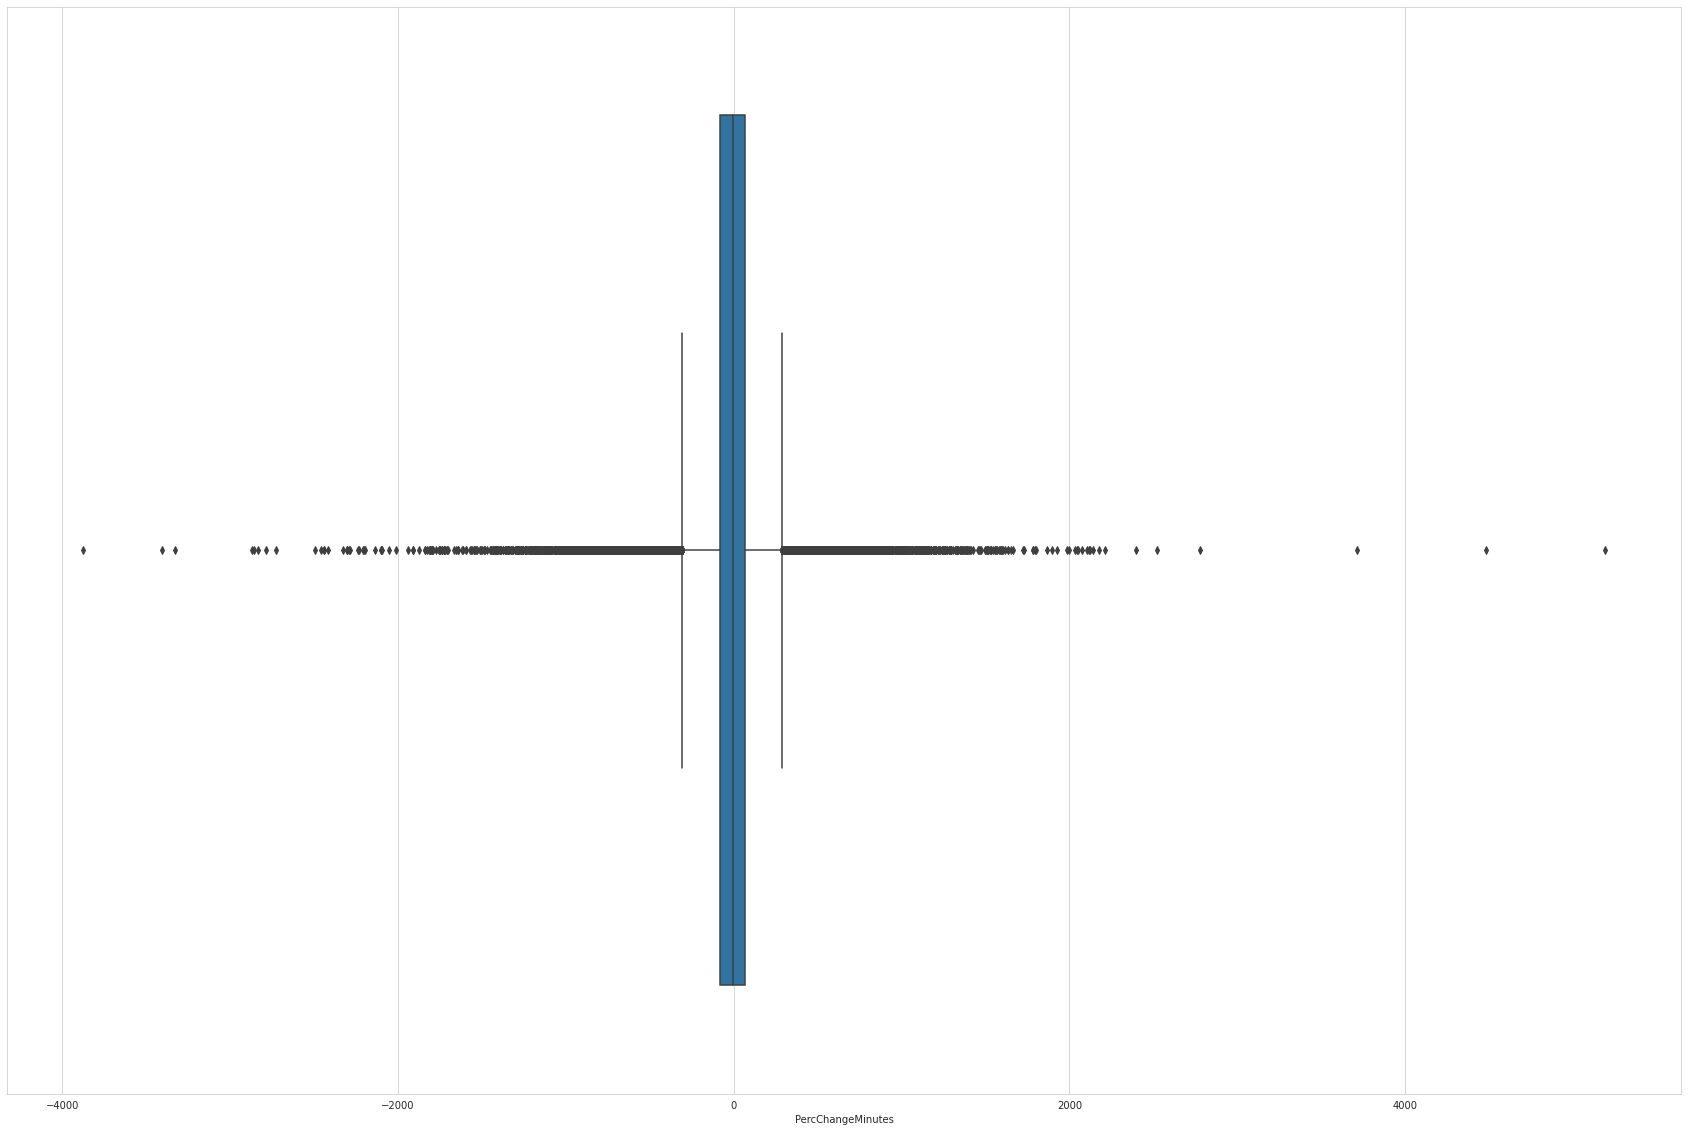

In [100]:
sns.boxplot(train['PercChangeMinutes'])

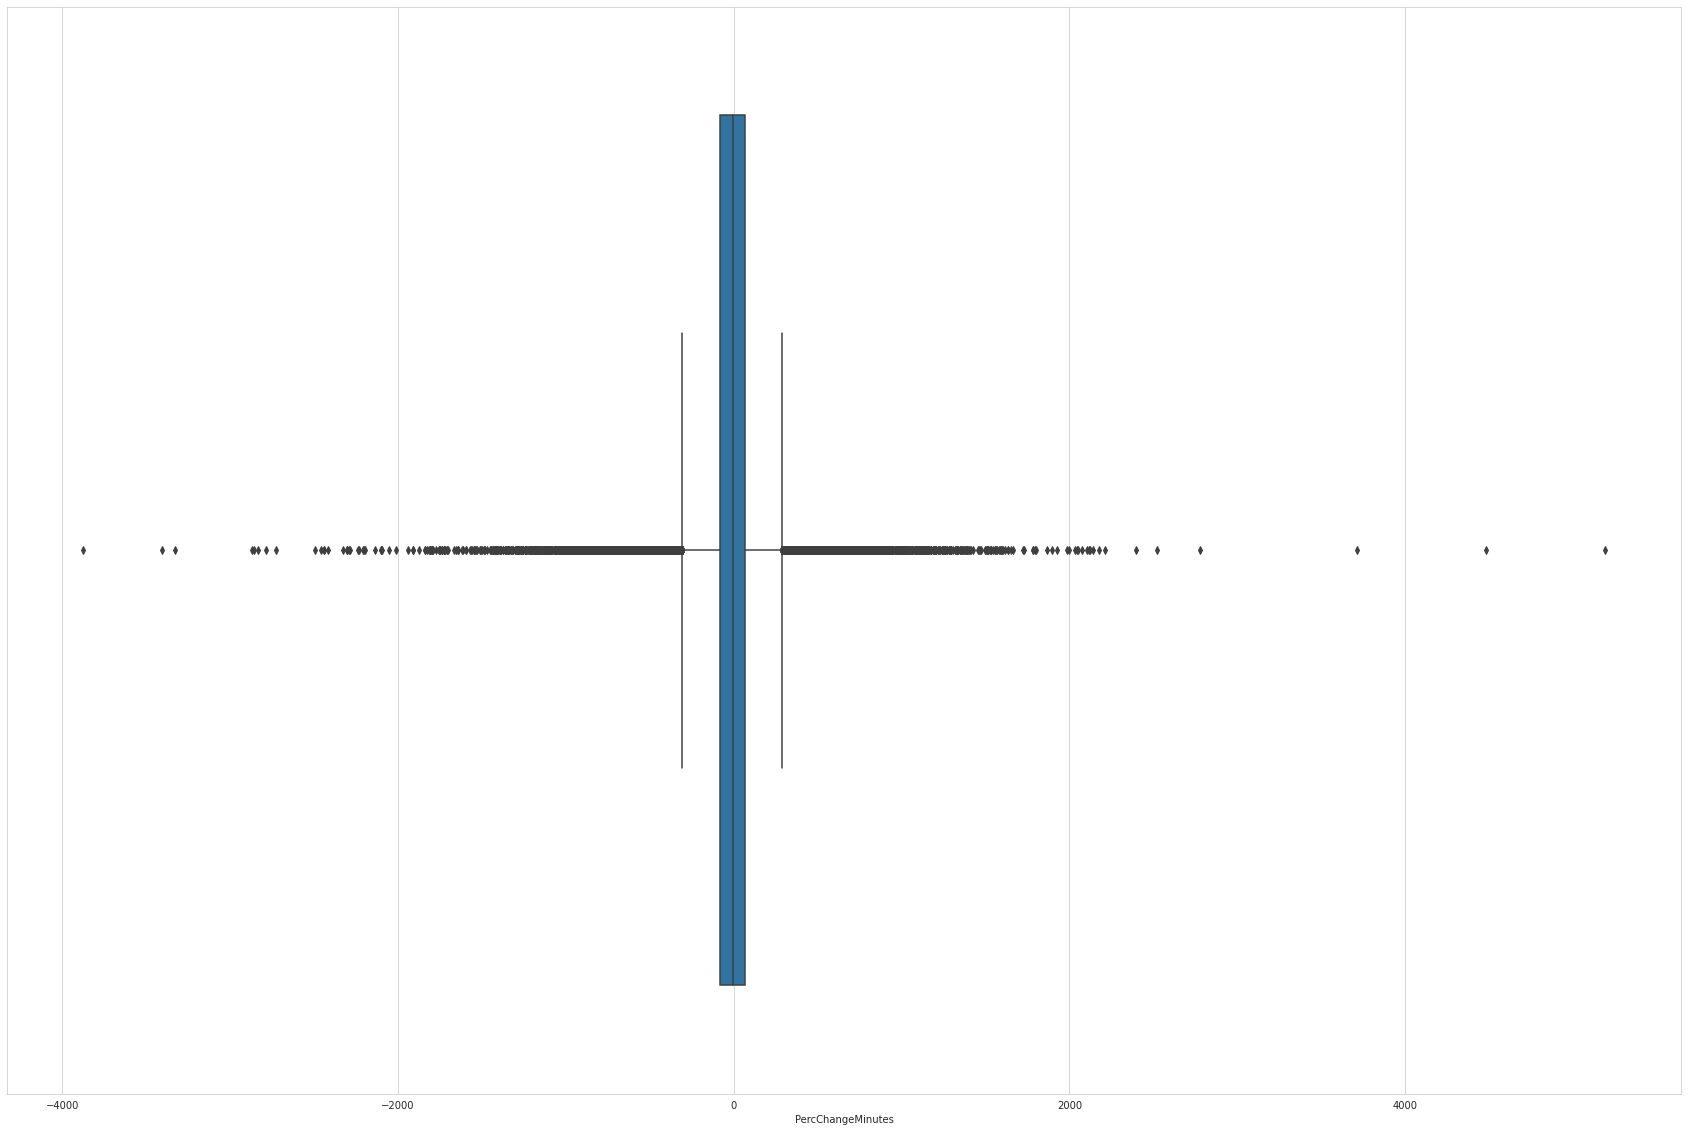

In [101]:
sns.boxplot(train['PercChangeMinutes'])

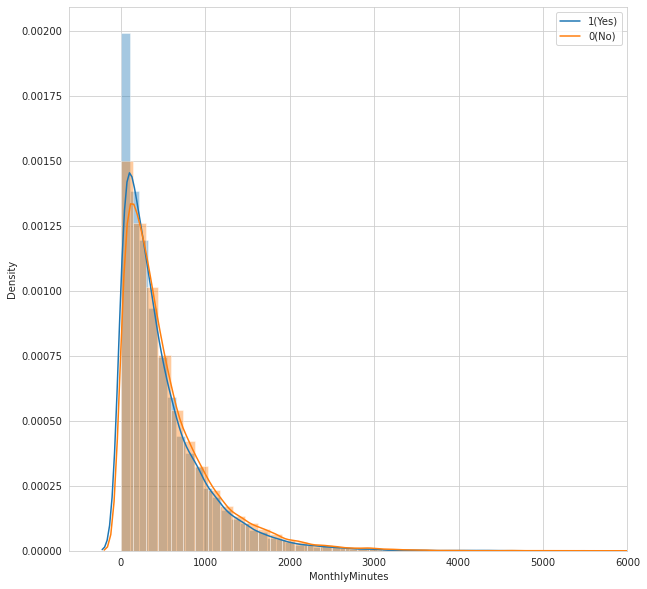

In [102]:
def plot_distro(train, col = '', y_limit=None, x_limit_r=None, x_limit_l = None):
    plt.figure(figsize=(10,10))
    plt.grid(True)
    sns.distplot(train[col][train.Churn == 'Yes'])
    sns.distplot(train[col][train.Churn == 'No'])
    plt.legend(['1(Yes)', '0(No)'])
    if y_limit:
        plt.ylim(top=y_limit)
    if x_limit_r:
        plt.xlim(right=x_limit_r)
    if x_limit_l:
        plt.xlim(left=x_limit_l)
plot_distro(train, col='MonthlyMinutes', x_limit_r=6000, x_limit_l=0)

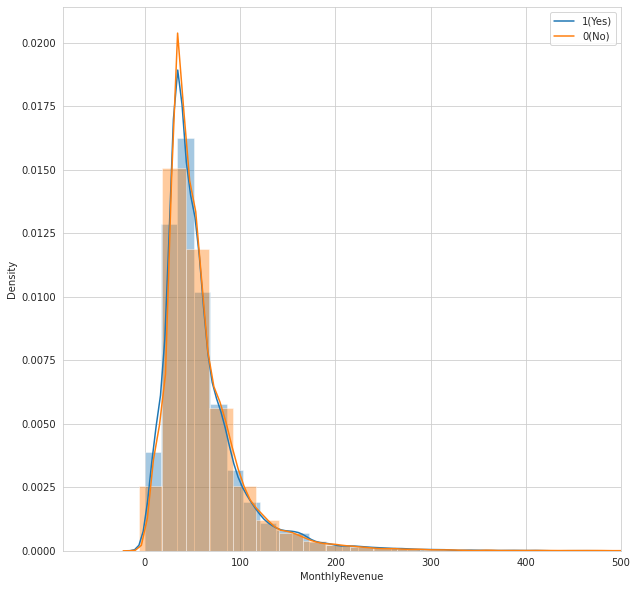

In [103]:
plot_distro(train, col='MonthlyRevenue', x_limit_r=500, x_limit_l=0)

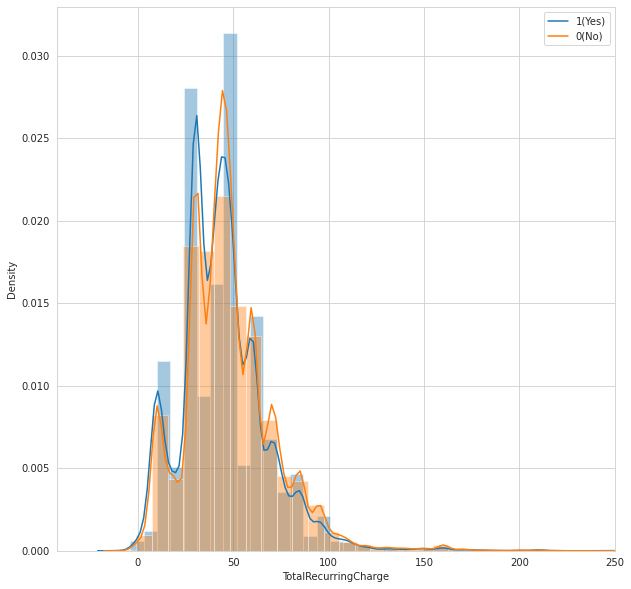

In [104]:
plot_distro(train, col='TotalRecurringCharge', x_limit_r=250, x_limit_l=0)

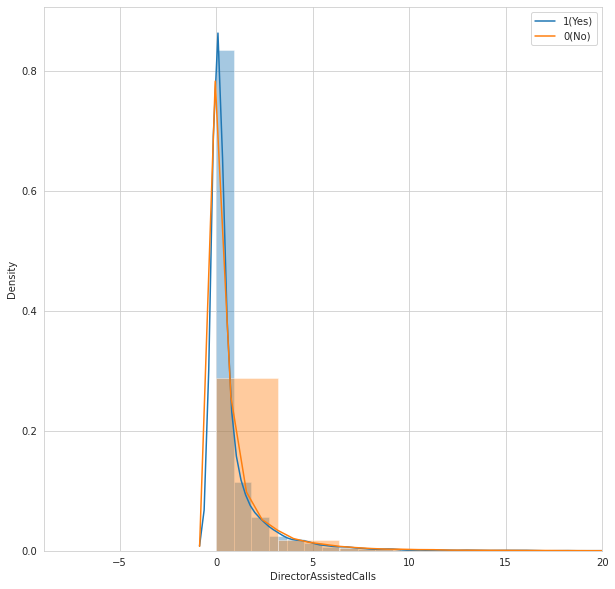

In [105]:
plot_distro(train, col='DirectorAssistedCalls', x_limit_r=20, x_limit_l=0)

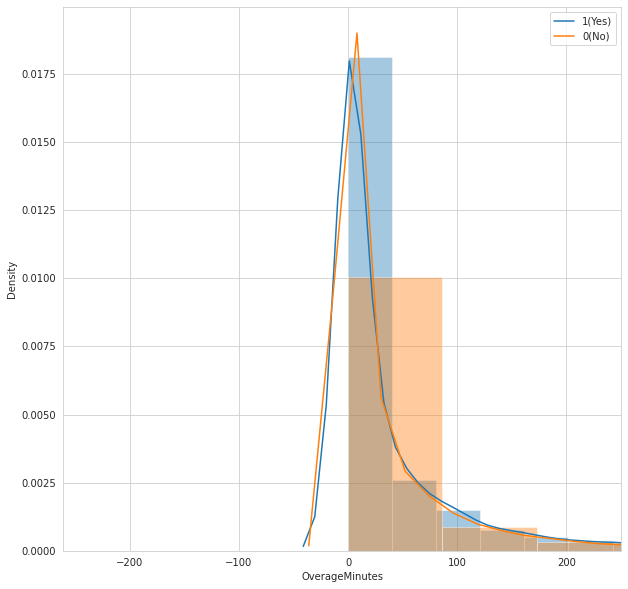

In [106]:
plot_distro(train, col='OverageMinutes', x_limit_r=250, x_limit_l=0)

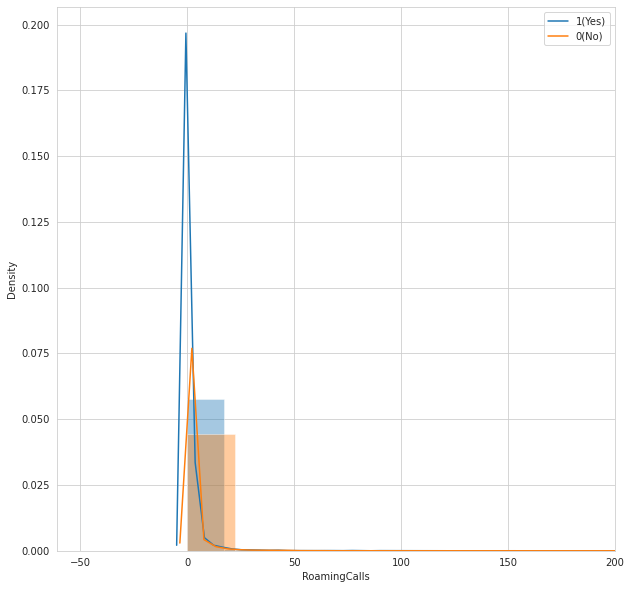

In [107]:
plot_distro(train, col='RoamingCalls', x_limit_r=200, x_limit_l=0)

In [110]:
!pip install catboost
!pip install lightgbm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from warnings import filterwarnings
filterwarnings('ignore')
Y = numerik['Churn']
X = numerik.drop(columns=['Churn'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=44)
print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', y_test.shape)

     |████████████████████████████████| 76.1 MB 58.7 MB/s            
     |████████████████████████████████| 46 kB 6.0 MB/s             
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.
X train shape:  (30628, 36)
Y train shape:  (30628,)
X test shape:  (20419, 36)
Y test shape:  (20419,)


In [114]:
rf_model = RandomForestClassifier(random_state = 42, n_estimators=150, max_depth=9, max_leaf_nodes=9).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)
print("** Karmaşıklık Matrisi **\n",confusion_matrix(y_test, y_pred))
print("** Test Seti Doğruluk Oranı **\n:",accuracy_score(y_test, y_pred))
print("** Train Seti Doğruluk Oranı **\n:",accuracy_score(y_train, y_pred_train))
print(classification_report(y_test, y_pred)) 

** Karmaşıklık Matrisi **
 [[14606     5]
 [ 5801     7]]
** Test Seti Doğruluk Oranı **
: 0.7156569861403594
** Train Seti Doğruluk Oranı **
: 0.7097100692177093
              precision    recall  f1-score   support

           0       0.72      1.00      0.83     14611
           1       0.58      0.00      0.00      5808

    accuracy                           0.72     20419
   macro avg       0.65      0.50      0.42     20419
weighted avg       0.68      0.72      0.60     20419



In [115]:
gbm_model = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)
y_pred = gbm_model.predict(X_test)
y_pred_train = gbm_model.predict(X_train)
print("** Karmaşıklık Matrisi **\n",confusion_matrix(y_test, y_pred))
print("** Test Seti Doğruluk Oranı **\n:",accuracy_score(y_test, y_pred))
print("** Train Seti Doğruluk Oranı **\n:",accuracy_score(y_train, y_pred_train))
print(classification_report(y_test, y_pred)) 

** Karmaşıklık Matrisi **
 [[14358   253]
 [ 5407   401]]
** Test Seti Doğruluk Oranı **
: 0.7228071893824379
** Train Seti Doğruluk Oranı **
: 0.7233903617604807
              precision    recall  f1-score   support

           0       0.73      0.98      0.84     14611
           1       0.61      0.07      0.12      5808

    accuracy                           0.72     20419
   macro avg       0.67      0.53      0.48     20419
weighted avg       0.69      0.72      0.63     20419



In [113]:
lgbm_model = LGBMClassifier(random_state = 42).fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)
y_pred_train = lgbm_model.predict(X_train)
print("** Karmaşıklık Matrisi **\n",confusion_matrix(y_test, y_pred))
print("** Test Seti Doğruluk Oranı **\n:",accuracy_score(y_test, y_pred))
print("** Train Seti Doğruluk Oranı **\n:",accuracy_score(y_train, y_pred_train))
print(classification_report(y_test, y_pred)) 

** Karmaşıklık Matrisi **
 [[14100   511]
 [ 5065   743]]
** Test Seti Doğruluk Oranı **
: 0.7269210049463735
** Train Seti Doğruluk Oranı **
: 0.7608397544730312
              precision    recall  f1-score   support

           0       0.74      0.97      0.83     14611
           1       0.59      0.13      0.21      5808

    accuracy                           0.73     20419
   macro avg       0.66      0.55      0.52     20419
weighted avg       0.69      0.73      0.66     20419



In [116]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
y_pred_train = knn_model.predict(X_train)
print("** Karmaşıklık Matrisi **\n",confusion_matrix(y_test, y_pred))
print("** Test Seti Doğruluk Oranı **\n:",accuracy_score(y_test, y_pred))
print("** Train Seti Doğruluk Oranı **\n:",accuracy_score(y_train, y_pred_train))
print(classification_report(y_test, y_pred)) 

** Karmaşıklık Matrisi **
 [[12603  2008]
 [ 4789  1019]]
** Test Seti Doğruluk Oranı **
: 0.6671237572848817
** Train Seti Doğruluk Oranı **
: 0.7555831265508685
              precision    recall  f1-score   support

           0       0.72      0.86      0.79     14611
           1       0.34      0.18      0.23      5808

    accuracy                           0.67     20419
   macro avg       0.53      0.52      0.51     20419
weighted avg       0.61      0.67      0.63     20419



In [117]:
!python -m pip install --upgrade pip
!pip install xgboost
from xgboost import XGBClassifier

     |████████████████████████████████| 2.1 MB 39.3 MB/s            
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1


In [118]:
xgb_model = XGBClassifier().fit(X_train, y_train)
xgb_model

[19:48:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [119]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7162936480728733

In [120]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)